### Лабораторная работа 1 и 2. Измерения производились одновременно.
### Работу выполнили: Аплавина Анна, Назирджонов Некруз, Никитин Владимир
### Группа: P33211

## Загрузка нужных файлов и их чтение

In [ ]:
# !wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1nISRW4kFEf6dNHdP8KOXHPo5fO88m3pb' -O calmPPG.dat
# !wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1J417h6GChUqn2iLpVx7cqUQuJpfdKBQ6' -O 2minPPG.dat
# !wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1z8AgJUYMtrv5ZH6_0GuClg6TXIdwgNmH' -O 5minPPG.dat
# !wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1iEf0a2OIcasoT7S1Ty0CnkQDKFkgI6uF' -O 15minPPG.dat



# !wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1ewPCawq25V6ol3cye5gI2TQ3NXTRLFn0' -O calmECG.dat
# !wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1BA1Nctd88fcGKAfrwumhHXJ6FOeTFp5a' -O 2minECG.dat
# !wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1hohL7DN1-Rq_G4SfmlFsfmWRk6tS3onN' -O 5minECG.dat
# !wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=15A5lHRRWk_dc5yBJUXZLmqQVKtBF6S4a' -O 15minECG.dat

In [ ]:
import pandas as pd

In [ ]:
calmECG = pd.read_csv('calmECG.dat', sep='\t', header=None, names=['x', 'y'])
calmPPG = pd.read_csv('calmPPG.dat', sep='\t', header=None, names=['x', 'y'])

ECG_2min = pd.read_csv('2minECG.dat', sep='\t', header=None, names=['x', 'y'])
PPG_2min = pd.read_csv('2minPPG.dat', sep='\t', header=None, names=['x', 'y'])

ECG_5min = pd.read_csv('5minECG.dat', sep='\t', header=None, names=['x', 'y'])
PPG_5min = pd.read_csv('5minPPG.dat', sep='\t', header=None, names=['x', 'y'])

ECG_15min = pd.read_csv('15minECG.dat', sep='\t', header=None, names=['x', 'y'])
PPG_15min = pd.read_csv('15minPPG.dat', sep='\t', header=None, names=['x', 'y'])

## ЭКГ

# Спокойное состояние

In [ ]:
import scipy.signal as signal
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def show_data_with_peaks(df, name):
  peaks, _ = signal.find_peaks(df['y'], height=[4.2, 5], distance=100)

  plt.figure(figsize=(40, 6))
  plt.plot(df['x'], df['y'], label=f'{name}')
  plt.plot(df['x'].iloc[peaks], df['y'].iloc[peaks], 'ro', label='Peaks')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.title(f'Peaks in {name}')
  plt.legend()
  plt.grid(True)
  plt.show()
  return peaks

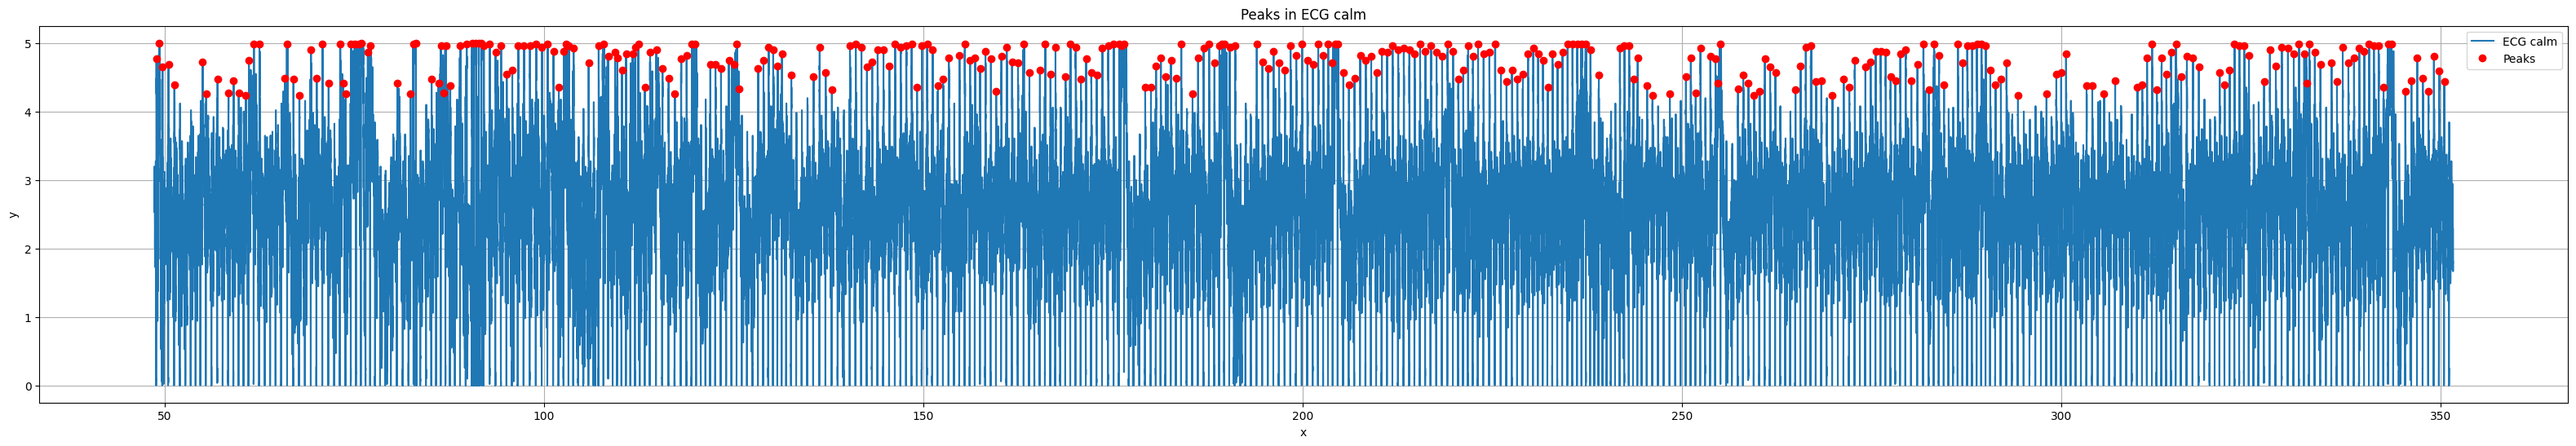

In [ ]:
peaks = show_data_with_peaks(calmECG, 'ECG calm')

In [ ]:
import matplotlib.pyplot as plt
from scipy import signal

def show_data_with_peaks_interval(df, name, min_time=None, max_time=None):
    if min_time is not None:
        df = df[df['x'] >= min_time]
    if max_time is not None:
        df = df[df['x'] <= max_time]
    if df.empty:
        print("No data in the specified time interval.")
        return []

    peaks, _ = signal.find_peaks(df['y'], height=[3, 7], distance=100)

    plt.figure(figsize=(40, 6))
    plt.plot(df['x'], df['y'], label=f'{name}')
    plt.plot(df['x'].iloc[peaks], df['y'].iloc[peaks], 'ro', label='Peaks')
    plt.xlabel('x (Time in seconds)')
    plt.ylabel('y')
    plt.title(f'Peaks in {name}')
    plt.legend()
    plt.grid(True)
    plt.show()

    return peaks

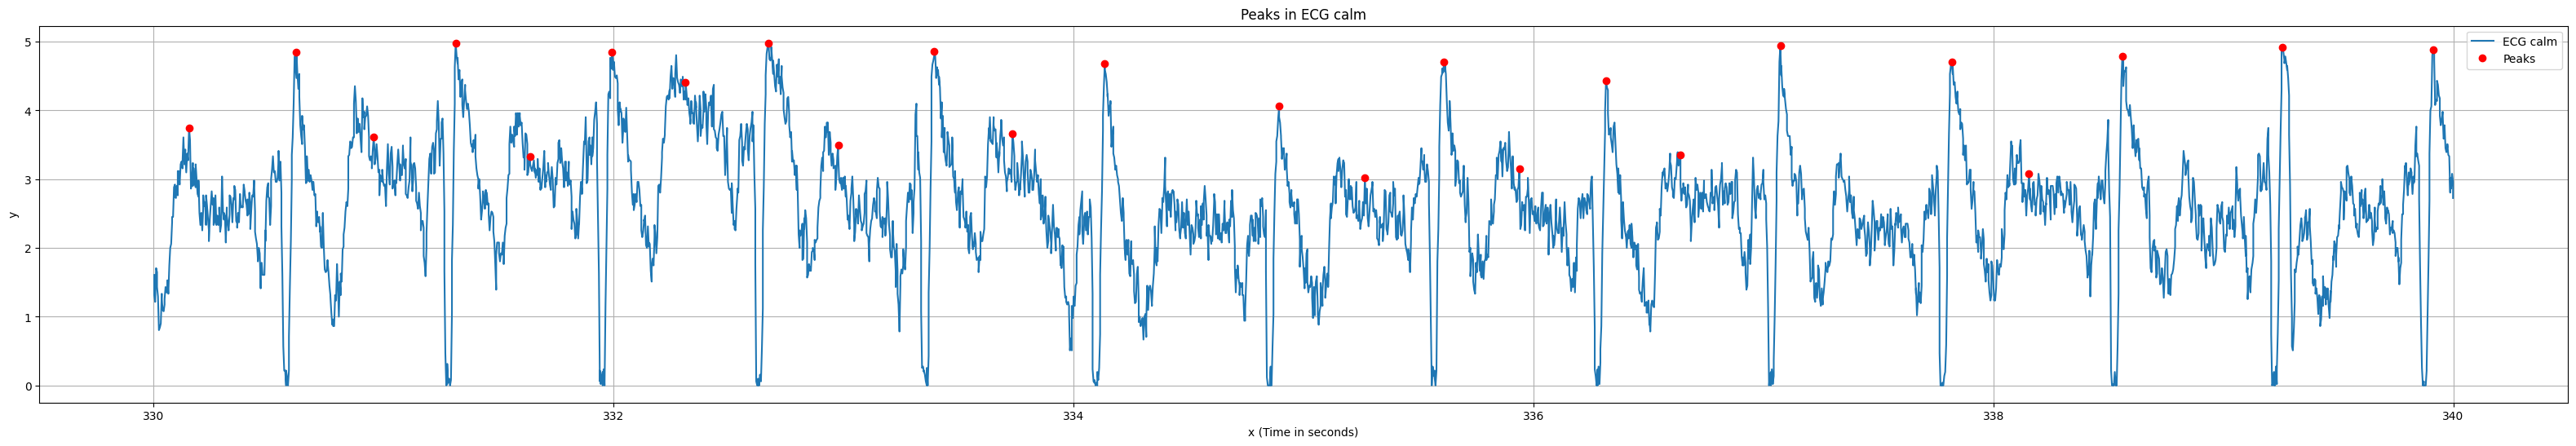

array([  48,  193,  297,  408,  508,  619,  719,  831,  931, 1071, 1184,
       1317, 1569, 1690, 1797, 1899, 2016, 2116, 2251, 2483, 2587, 2713,
       2935, 3153])

In [ ]:
show_data_with_peaks_interval(calmECG, 'ECG calm', min_time=330, max_time=340)

In [ ]:
def show_cig(df, name, peaks, min_value=0.2, max_value=1):
    RR_intervals = df['x'].iloc[peaks].diff().dropna()
    RR_intervals_filtered = RR_intervals.copy()
    RR_intervals_filtered = RR_intervals_filtered[((RR_intervals >= min_value) & (RR_intervals <= max_value))]

    plt.figure(figsize=(30, 6))
    plt.scatter(df['x'].iloc[peaks][1:len(RR_intervals_filtered) + 1], RR_intervals_filtered, color='b', marker='o')
    plt.xlabel('Time')
    plt.ylabel('RR Intervals')
    plt.title(f'Cardio-Intervalogram (CIG) of {name}')
    plt.grid(True)
    plt.show()

    return RR_intervals_filtered

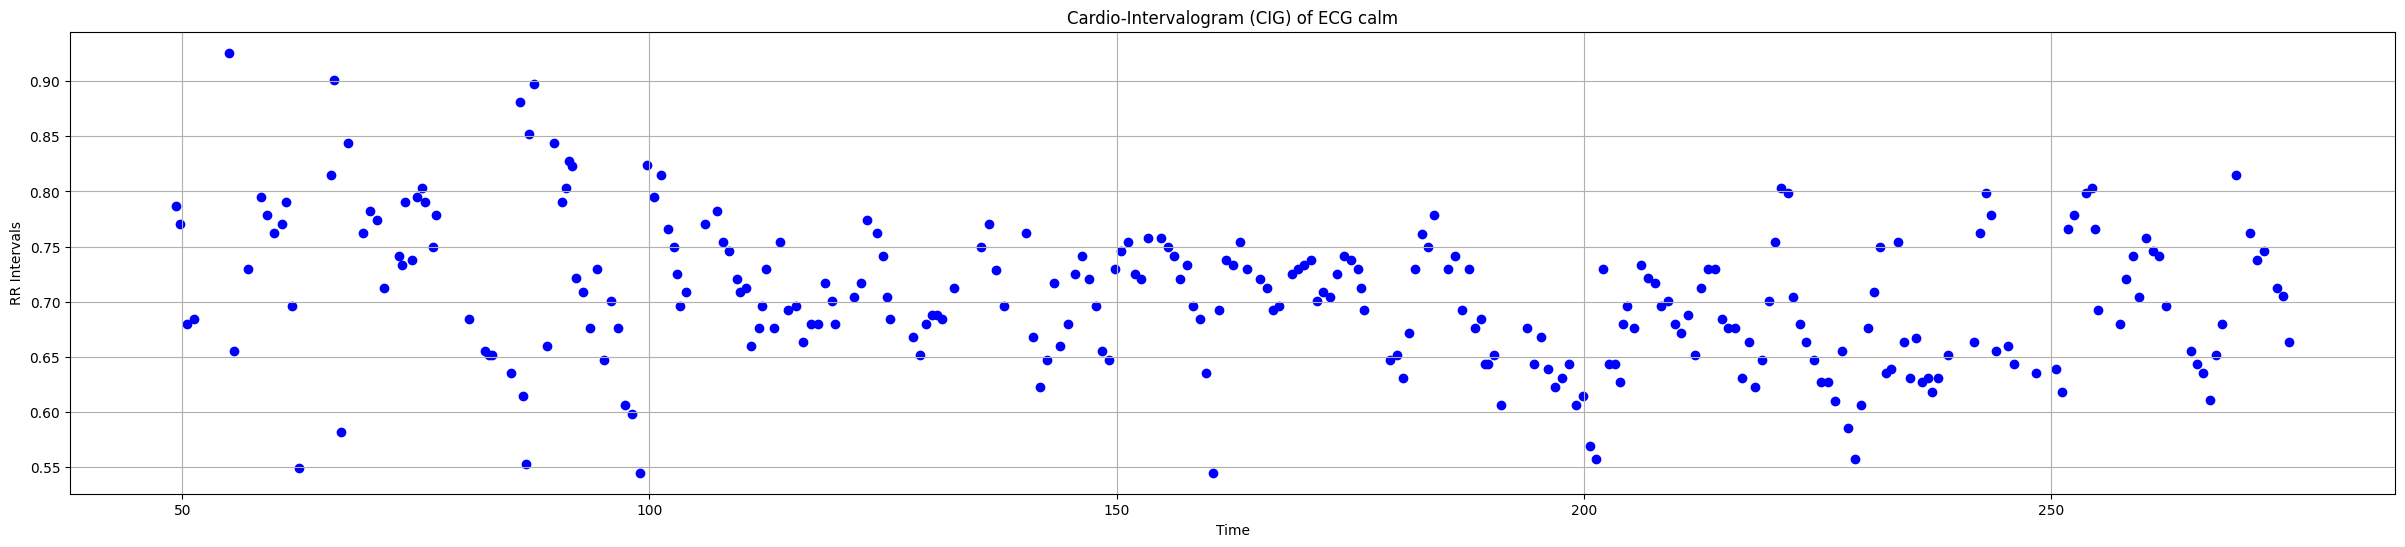

In [ ]:
RR_intervals = show_cig(calmECG, 'ECG calm', peaks, min_value=0.5)

In [ ]:
import matplotlib.pyplot as plt

def show_rrint_hist(intervals):
    min_interval = (intervals.min() // 0.05) * 0.05
    max_interval = ((intervals.max() // 0.05) + 1) * 0.05

    interval_edges = list(np.arange(min_interval, max_interval + 0.05, 0.05))
    interval_counts = [((intervals >= start) & (intervals < start + 0.05)).sum() for start in interval_edges[:-1]]

    print(f'Минимум = {intervals.min()}\nМаксимум = {intervals.max()}\n')

    plt.hist(intervals, bins=interval_edges, color='b')
    plt.xlabel('Интервалы')
    plt.ylabel('Количество значений')
    plt.show()

    for i in range(len(interval_counts)):
        print(f'Для интервала {interval_edges[i]}-{interval_edges[i+1]} количество значений = {interval_counts[i]}')

    return interval_counts, interval_edges

Минимум = 0.5448455799999863
Максимум = 0.9257698099999985



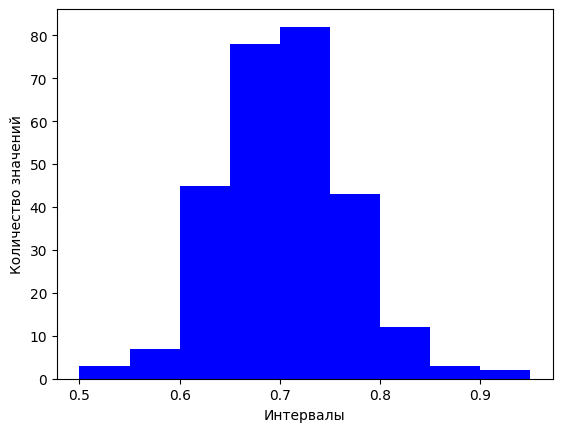

Для интервала 0.5-0.55 количество значений = 3
Для интервала 0.55-0.6000000000000001 количество значений = 7
Для интервала 0.6000000000000001-0.6500000000000001 количество значений = 45
Для интервала 0.6500000000000001-0.7000000000000002 количество значений = 78
Для интервала 0.7000000000000002-0.7500000000000002 количество значений = 82
Для интервала 0.7500000000000002-0.8000000000000003 количество значений = 43
Для интервала 0.8000000000000003-0.8500000000000003 количество значений = 12
Для интервала 0.8500000000000003-0.9000000000000004 количество значений = 3
Для интервала 0.9000000000000004-0.9500000000000004 количество значений = 2


In [ ]:
n, bins = show_rrint_hist(RR_intervals)

In [ ]:
import numpy as np

In [ ]:
ecg_hrv = []
ecg_rrnn = []
ecg_drr = []
ecg_sdnn = []
ecg_mo = []
ecg_amo = []
ecg_rmssd = []
ecg_im = []

In [ ]:
def print_statistics(RR_intervals, df, n, bins):
  hrv = len(RR_intervals)*60/(df['x'].max() - df['x'].min())
  rrnn = RR_intervals.sum()*1000/len(RR_intervals)
  drr = (RR_intervals.max() - RR_intervals.min()) * 1000

  squared_diff = [(x*1000 - rrnn)**2 for x in RR_intervals]
  sdnn = np.sqrt(np.mean(squared_diff))

  mode_index = np.argmax(n)
  mo = ((bins[mode_index] + bins[mode_index + 1]) / 2) * 1000
  amo = (n[mode_index]/len(RR_intervals)) * 100
  rmssd = np.sqrt(np.sum(np.diff(RR_intervals)**2)/(len(RR_intervals)-1)) * 1000
  im = (amo * 1000000)/(2*drr*mo)

  print(f"Частота сердечных сокращений: {hrv} уд/мин; Норма: 60…80")
  print(f"Среднее значение КИ: {rrnn} мс; Норма: 660…937")
  print(f"Вариационный размах: {drr} мс; Норма: 300…450")
  print(f"Среднеквадратичное отклонение: {sdnn} мс; Норма: 100…190")
  print(f"Мода: {mo} мс; Норма: 620…800")
  print(f"Амплитуда моды: {amo}%; Норма: 25…38")
  print(f"Квадратный корень суммы разностей последовательных КИ: {rmssd}; Норма: 15…35")
  print(f"Индекс напряжения регуляторных систем Баевского: {im}; Норма: 30…120")

  ecg_hrv.append(hrv)
  ecg_rrnn.append(rrnn)
  ecg_drr.append(drr)
  ecg_sdnn.append(sdnn)
  ecg_mo.append(mo)
  ecg_amo.append(amo)
  ecg_rmssd.append(rmssd)
  ecg_im.append(im)

In [ ]:
print_statistics(RR_intervals, calmECG, n, bins)

Частота сердечных сокращений: 54.46211912233244 уд/мин; Норма: 60…80
Среднее значение КИ: 704.488691709091 мс; Норма: 660…937
Вариационный размах: 380.9242300000122 мс; Норма: 300…450
Среднеквадратичное отклонение: 64.22359036590682 мс; Норма: 100…190
Мода: 725.0000000000002 мс; Норма: 620…800
Амплитуда моды: 29.818181818181817%; Норма: 25…38
Квадратный корень суммы разностей последовательных КИ: 68.44356331768235; Норма: 15…35
Индекс напряжения регуляторных систем Баевского: 53.98518052496516; Норма: 30…120


In [ ]:
def show_scatter(RR_intervals):
  diff_rr = np.diff(RR_intervals)

  plt.figure(figsize=(8, 6))
  plt.scatter(RR_intervals[:-1], RR_intervals[1:], color='blue', alpha=1, s=10)
  plt.xlim(0, 1.4)
  plt.ylim(0, 1.4)
  plt.xlabel('RR Interval (sec)')
  plt.ylabel('RR Interval (sec) + 1')
  plt.title('Scatterplot of RR Intervals')
  plt.grid(True)
  plt.show()

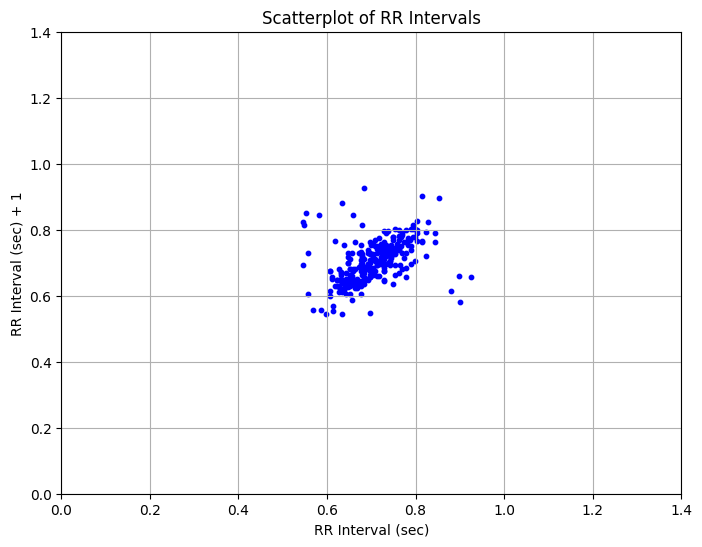

In [ ]:
show_scatter(RR_intervals)

# После 2 минут

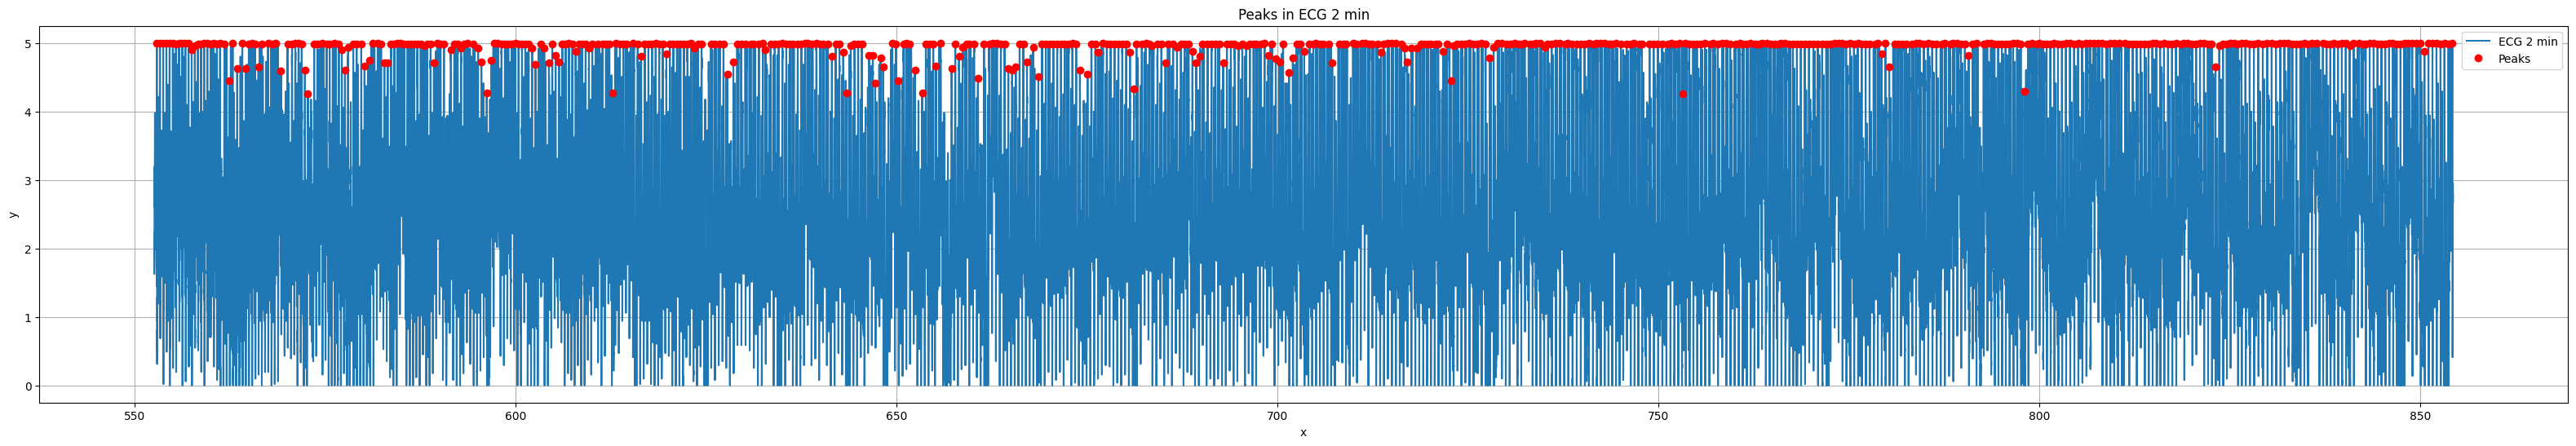

In [ ]:
peaks = show_data_with_peaks(ECG_2min, 'ECG 2 min')

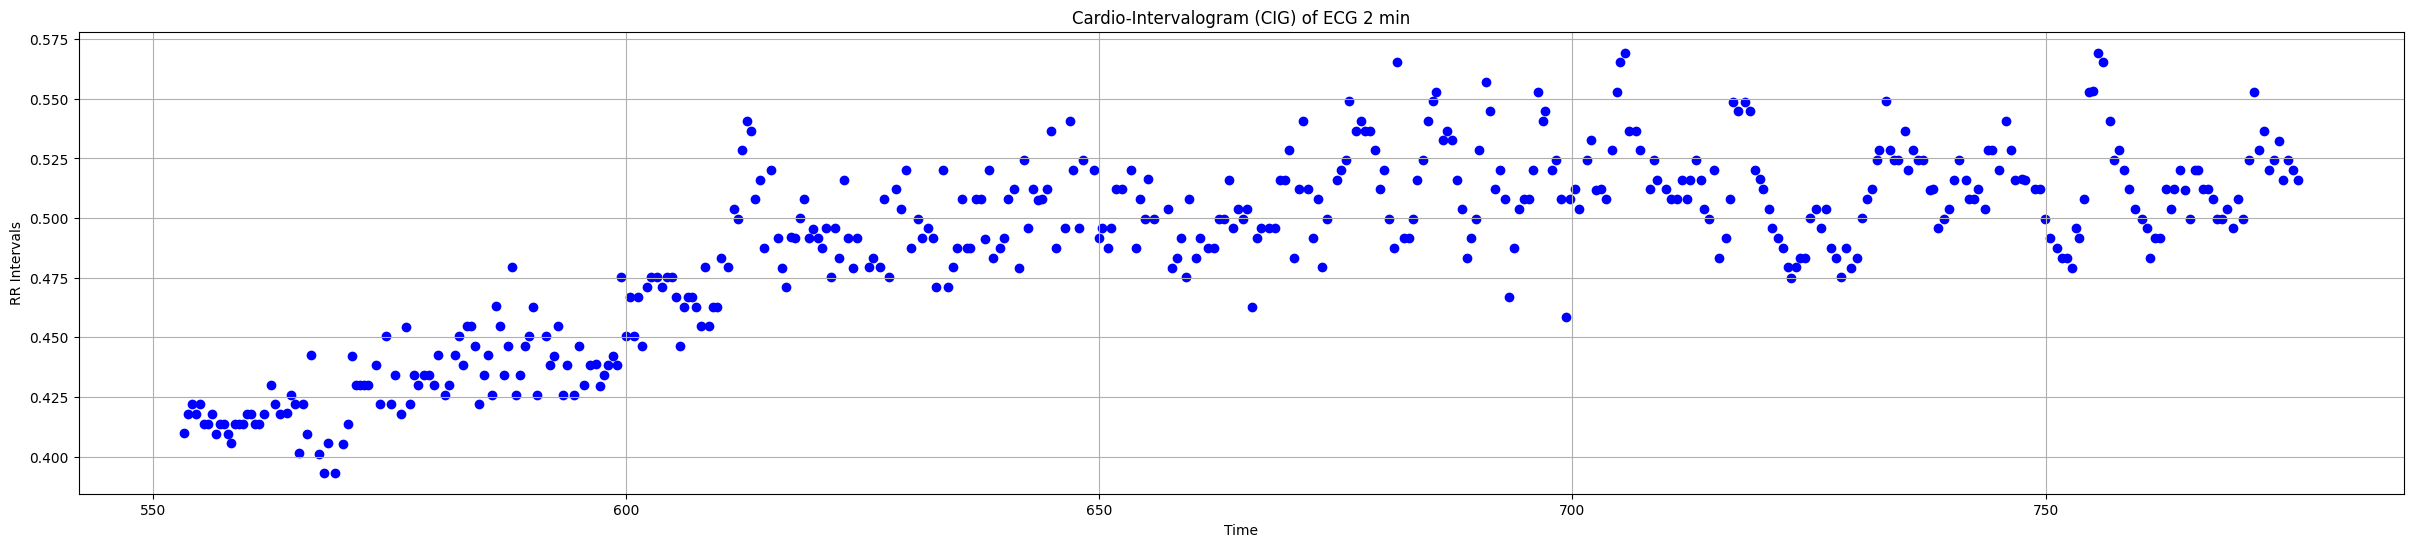

In [ ]:
RR_intervals = show_cig(ECG_2min, 'ECG 2 min', peaks, min_value=0.38, max_value=0.57)

Минимум = 0.3932495200000403
Максимум = 0.5693359400000872



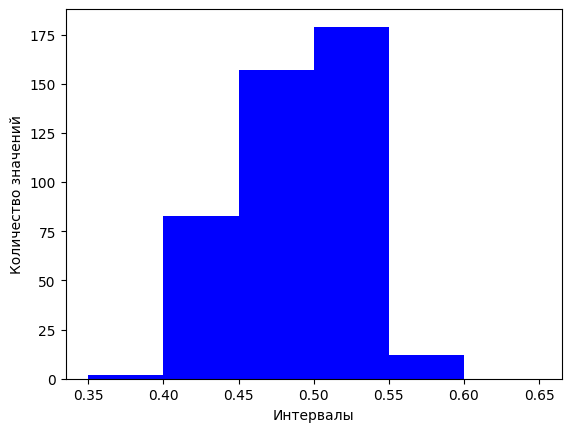

Для интервала 0.35000000000000003-0.4 количество значений = 2
Для интервала 0.4-0.45 количество значений = 83
Для интервала 0.45-0.5 количество значений = 157
Для интервала 0.5-0.55 количество значений = 179
Для интервала 0.55-0.6 количество значений = 12
Для интервала 0.6-0.6499999999999999 количество значений = 0


In [ ]:
n, bins = show_rrint_hist(RR_intervals)

In [ ]:
print_statistics(RR_intervals, ECG_2min, n, bins)

Частота сердечных сокращений: 86.09180751578486 уд/мин; Норма: 60…80
Среднее значение КИ: 489.1002205311785 мс; Норма: 660…937
Вариационный размах: 176.08642000004693 мс; Норма: 300…450
Среднеквадратичное отклонение: 38.49937859663079 мс; Норма: 100…190
Мода: 525.0 мс; Норма: 620…800
Амплитуда моды: 41.339491916859124%; Норма: 25…38
Квадратный корень суммы разностей последовательных КИ: 17.588409519562298; Норма: 15…35
Индекс напряжения регуляторных систем Баевского: 223.5887621698055; Норма: 30…120


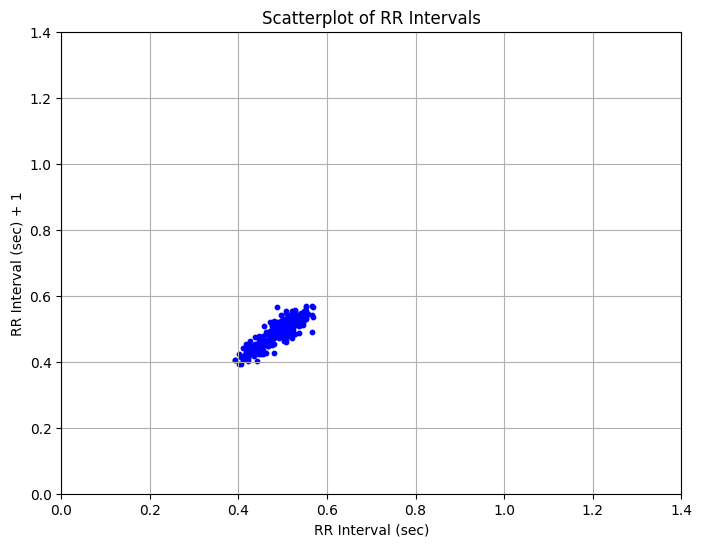

In [ ]:
show_scatter(RR_intervals)

# После 5 минут

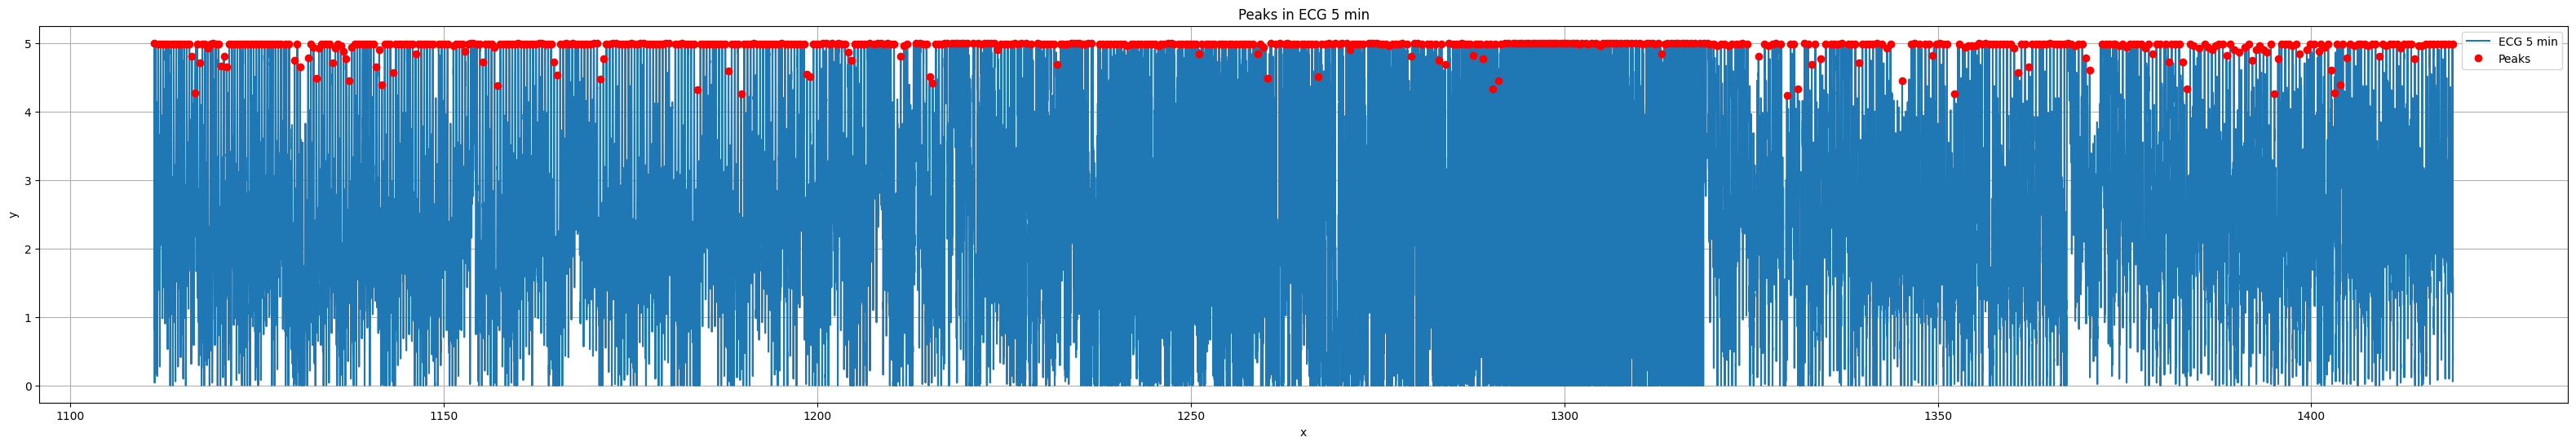

In [ ]:
peaks = show_data_with_peaks(ECG_5min, 'ECG 5 min')

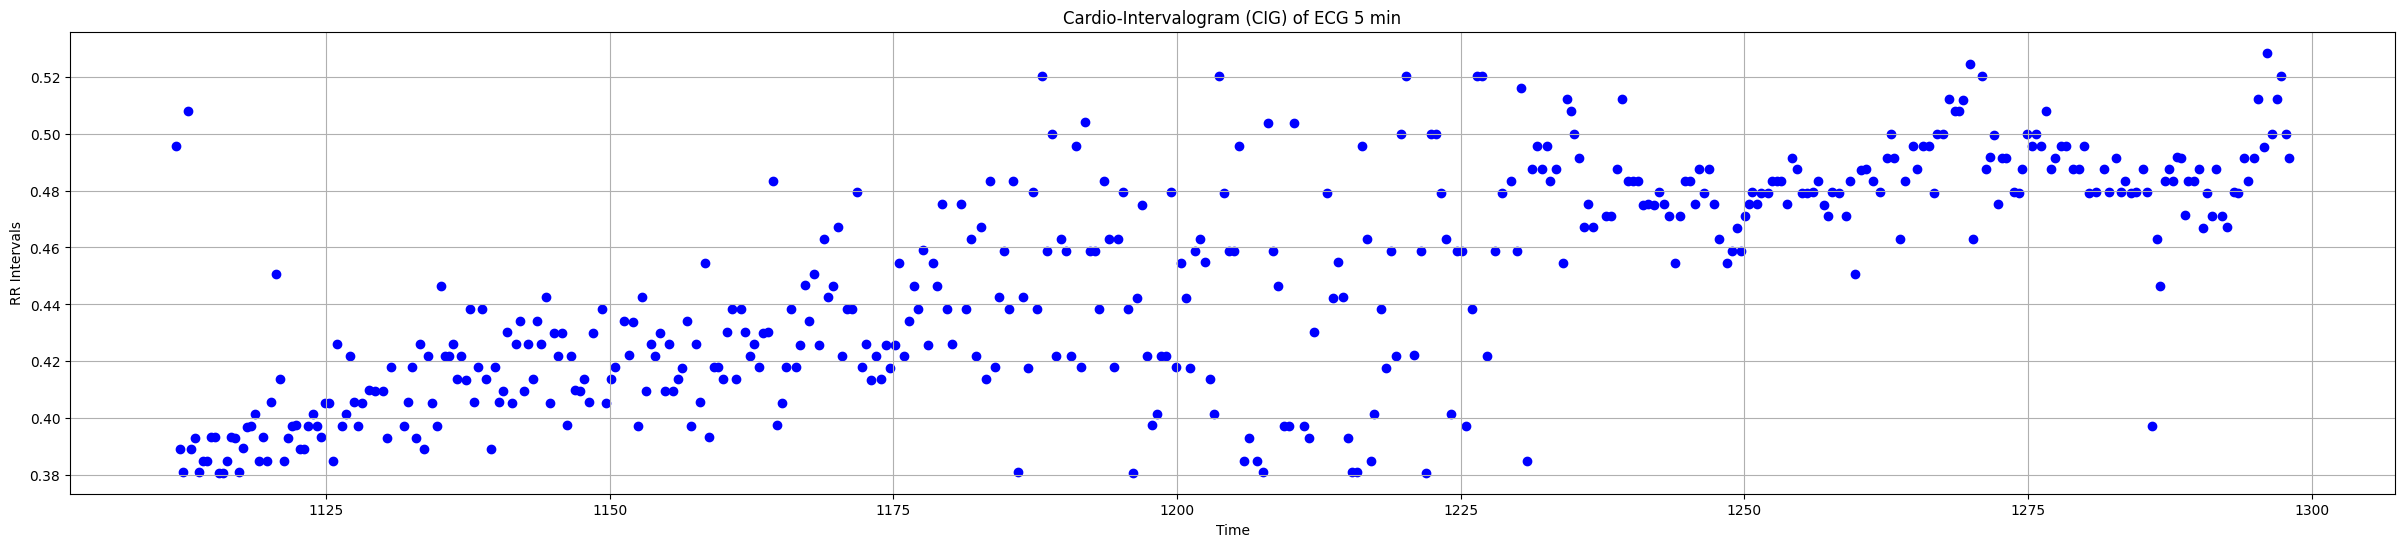

In [ ]:
RR_intervals = show_cig(ECG_5min, 'ECG 5 min', peaks, min_value=0.38, max_value=0.53)

Минимум = 0.3808593699998255
Максимум = 0.528442380000115



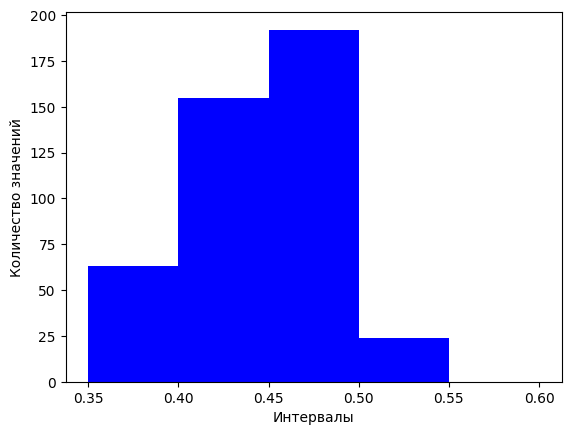

Для интервала 0.35000000000000003-0.4 количество значений = 63
Для интервала 0.4-0.45 количество значений = 155
Для интервала 0.45-0.5 количество значений = 192
Для интервала 0.5-0.55 количество значений = 24
Для интервала 0.55-0.6 количество значений = 0


In [ ]:
n, bins = show_rrint_hist(RR_intervals)

In [ ]:
print_statistics(RR_intervals, ECG_5min, n, bins)

Частота сердечных сокращений: 84.6114163721997 уд/мин; Норма: 60…80
Среднее значение КИ: 447.8565689861728 мс; Норма: 660…937
Вариационный размах: 147.5830100002895 мс; Норма: 300…450
Среднеквадратичное отклонение: 38.678096538823446 мс; Норма: 100…190
Мода: 475.0 мс; Норма: 620…800
Амплитуда моды: 44.23963133640553%; Норма: 25…38
Квадратный корень суммы разностей последовательных КИ: 33.76222121920602; Норма: 15…35
Индекс напряжения регуляторных систем Баевского: 315.5378995563154; Норма: 30…120


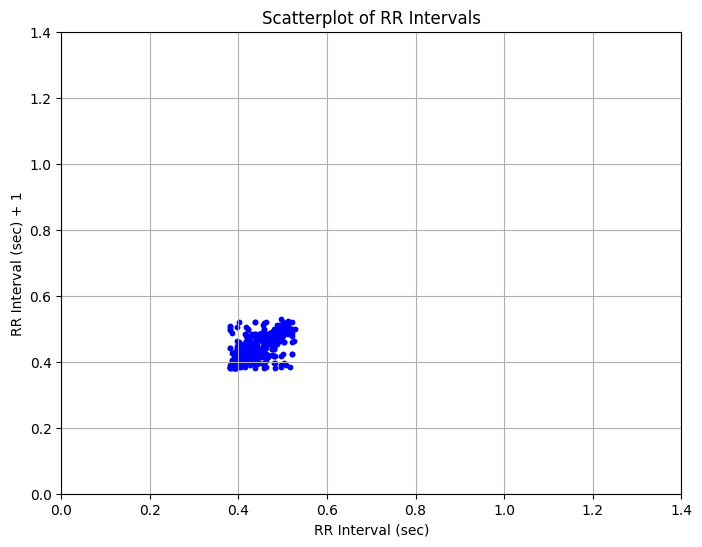

In [ ]:
show_scatter(RR_intervals)

# После 15 минут

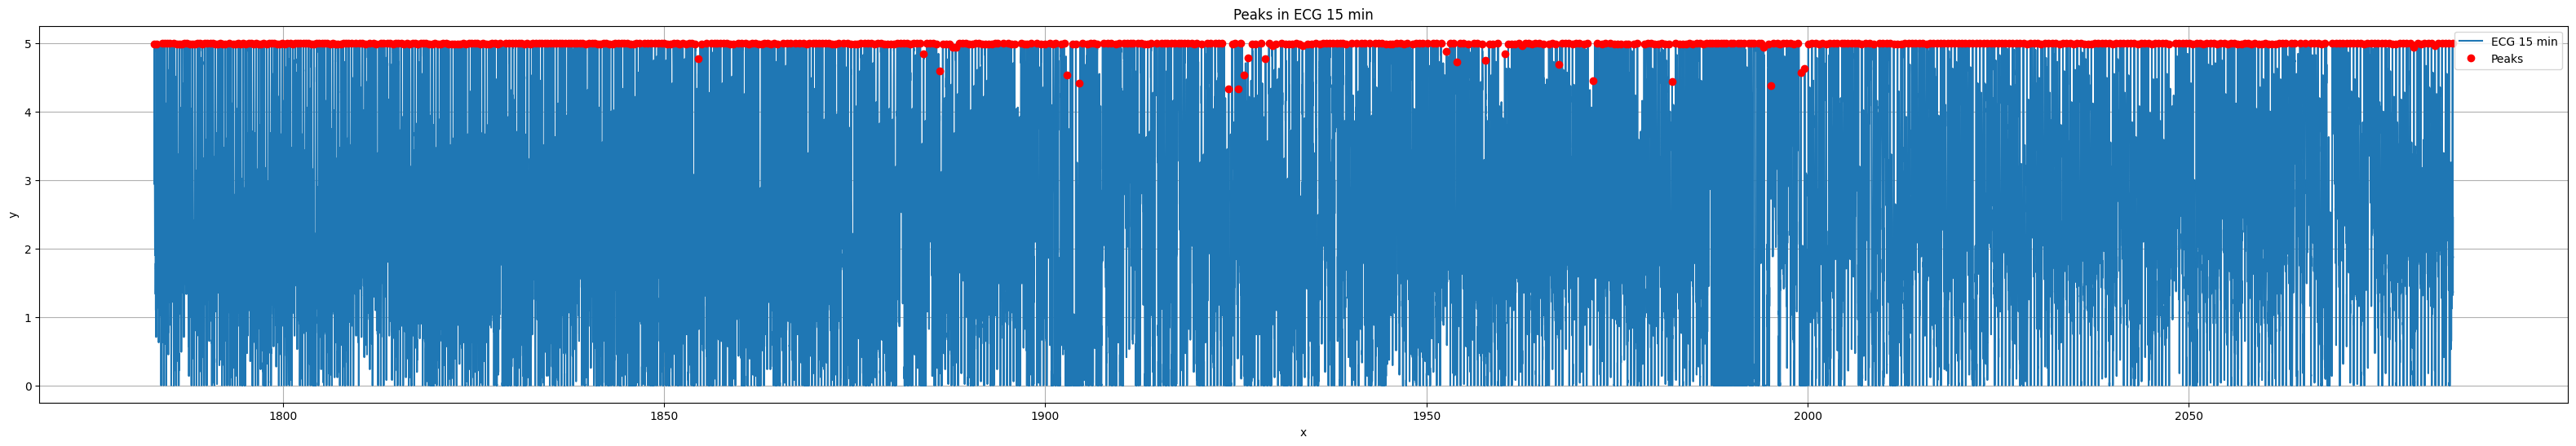

In [ ]:
peaks = show_data_with_peaks(ECG_15min, 'ECG 15 min')

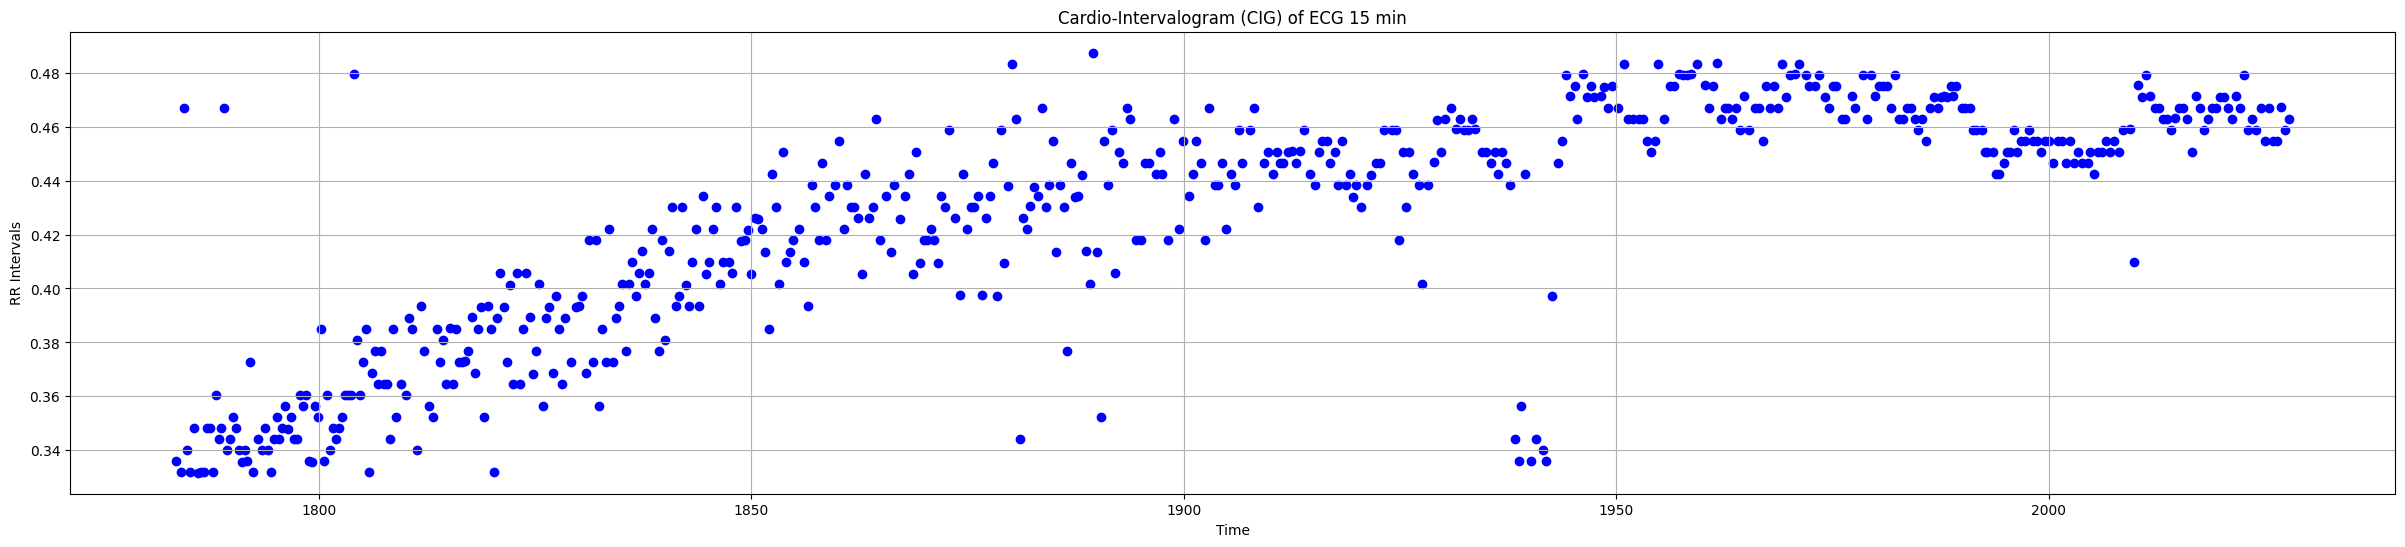

In [ ]:
RR_intervals = show_cig(ECG_15min, 'ECG 15 min', peaks, min_value=0.33, max_value=0.49)

Минимум = 0.33166503999996166
Максимум = 0.48742676000006213



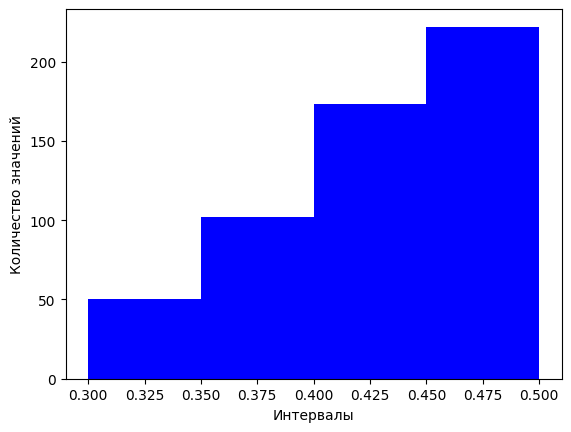

Для интервала 0.30000000000000004-0.35000000000000003 количество значений = 50
Для интервала 0.35000000000000003-0.4 количество значений = 102
Для интервала 0.4-0.45 количество значений = 173
Для интервала 0.45-0.5 количество значений = 222


In [ ]:
n, bins = show_rrint_hist(RR_intervals)

In [ ]:
print_statistics(RR_intervals, ECG_15min, n, bins)

Частота сердечных сокращений: 108.84968370867016 уд/мин; Норма: 60…80
Среднее значение КИ: 424.8058032541135 мс; Норма: 660…937
Вариационный размах: 155.76172000010047 мс; Норма: 300…450
Среднеквадратичное отклонение: 43.32024165119004 мс; Норма: 100…190
Мода: 475.0 мс; Норма: 620…800
Амплитуда моды: 40.58500914076782%; Норма: 25…38
Квадратный корень суммы разностей последовательных КИ: 26.1590969245354; Норма: 15…35
Индекс напряжения регуляторных систем Баевского: 274.2718959023581; Норма: 30…120


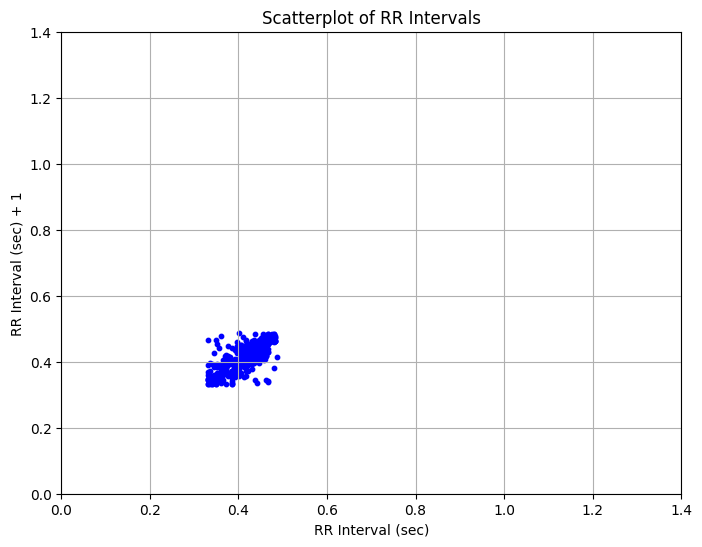

In [ ]:
show_scatter(RR_intervals)

# ФПГ

# Спокойное состояние

In [ ]:
def show_data_with_peaks(df, name):
  peaks, _ = signal.find_peaks(df['y'], height=[3, 5], distance=100)

  plt.figure(figsize=(40, 6))
  plt.plot(df['x'], df['y'], label=f'{name}')
  plt.plot(df['x'].iloc[peaks], df['y'].iloc[peaks], 'ro', label='Peaks')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.title(f'Peaks in {name}')
  plt.legend()
  plt.grid(True)
  plt.show()
  return peaks

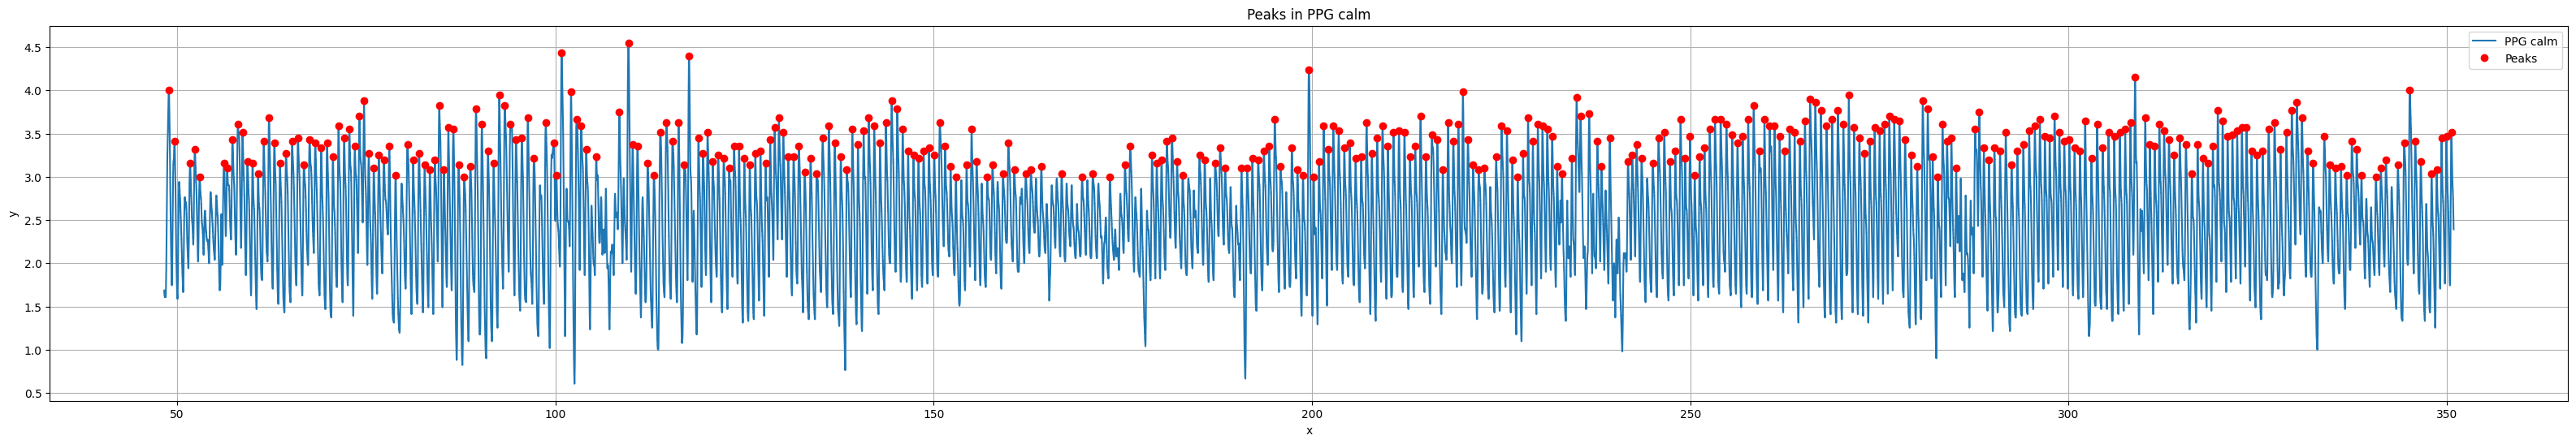

In [ ]:
peaks = show_data_with_peaks(calmPPG, 'PPG calm')

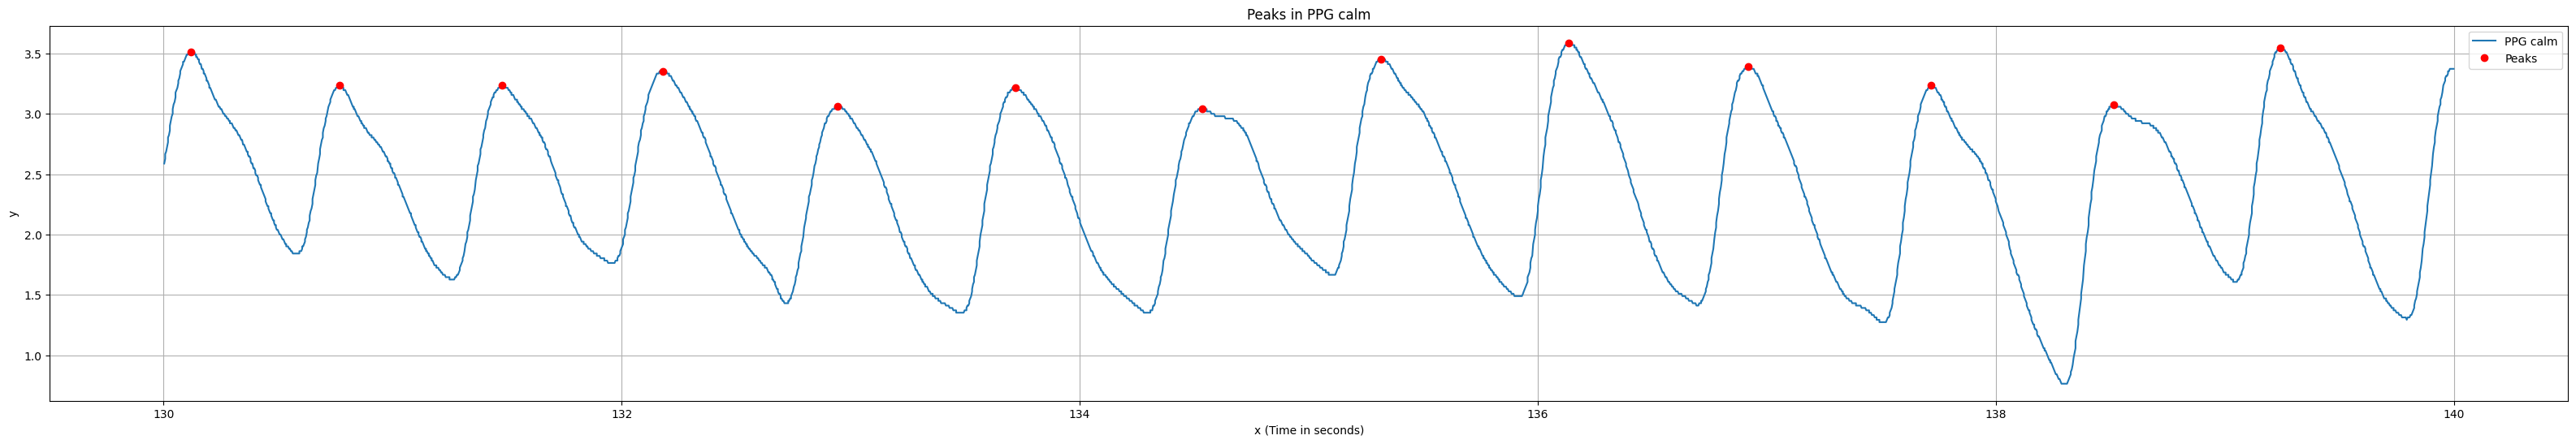

array([  39,  245,  470,  696,  938, 1187, 1445, 1696, 1957, 2205, 2462,
       2714, 2948])

In [ ]:
show_data_with_peaks_interval(calmPPG, 'PPG calm', min_time=130, max_time=140)

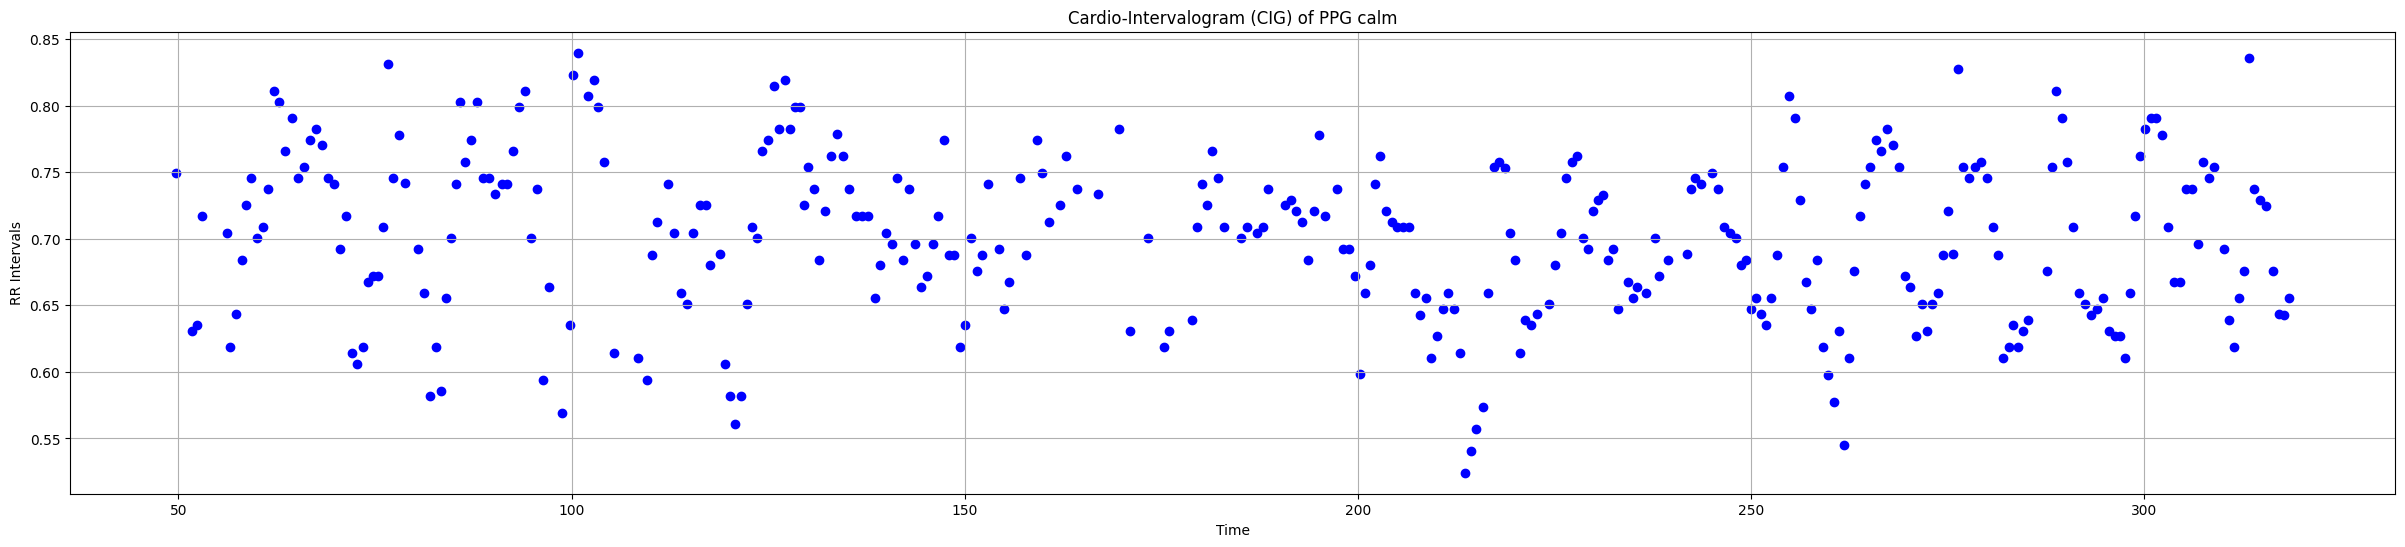

In [ ]:
RR_intervals = show_cig(calmPPG, 'PPG calm',peaks, min_value=0.5)

Минимум = 0.5242920000000026
Максимум = 0.8397979700000064



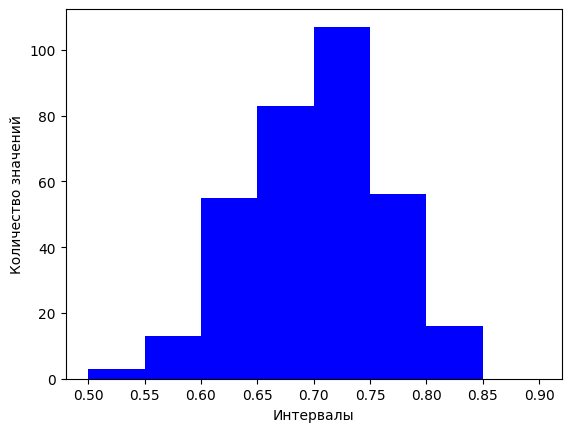

Для интервала 0.5-0.55 количество значений = 3
Для интервала 0.55-0.6000000000000001 количество значений = 13
Для интервала 0.6000000000000001-0.6500000000000001 количество значений = 55
Для интервала 0.6500000000000001-0.7000000000000002 количество значений = 83
Для интервала 0.7000000000000002-0.7500000000000002 количество значений = 107
Для интервала 0.7500000000000002-0.8000000000000003 количество значений = 56
Для интервала 0.8000000000000003-0.8500000000000003 количество значений = 16
Для интервала 0.8500000000000003-0.9000000000000004 количество значений = 0


In [ ]:
n, bins = show_rrint_hist(RR_intervals)

In [ ]:
ppg_hrv = []
ppg_rrnn = []
ppg_drr = []
ppg_sdnn = []
ppg_mo = []
ppg_amo = []
ppg_rmssd = []
ppg_im = []

In [ ]:
def print_statistics(RR_intervals, df, n, bins):
  hrv = len(RR_intervals)*60/(df['x'].max() - df['x'].min())
  rrnn = RR_intervals.sum()*1000/len(RR_intervals)
  drr = (RR_intervals.max() - RR_intervals.min()) * 1000

  squared_diff = [(x*1000 - rrnn)**2 for x in RR_intervals]
  sdnn = np.sqrt(np.mean(squared_diff))

  mode_index = np.argmax(n)
  mo = ((bins[mode_index] + bins[mode_index + 1]) / 2) * 1000
  amo = (n[mode_index]/len(RR_intervals)) * 100
  rmssd = np.sqrt(np.sum(np.diff(RR_intervals)**2)/(len(RR_intervals)-1)) * 1000
  im = (amo * 1000000)/(2*drr*mo)

  print(f"Частота сердечных сокращений: {hrv} уд/мин; Норма: 60…80")
  print(f"Среднее значение КИ: {rrnn} мс; Норма: 660…937")
  print(f"Вариационный размах: {drr} мс; Норма: 300…450")
  print(f"Среднеквадратичное отклонение: {sdnn} мс; Норма: 100…190")
  print(f"Мода: {mo} мс; Норма: 620…800")
  print(f"Амплитуда моды: {amo}%; Норма: 25…38")
  print(f"Квадратный корень суммы разностей последовательных КИ: {rmssd}; Норма: 15…35")
  print(f"Индекс напряжения регуляторных систем Баевского: {im}; Норма: 30…120")

  ppg_hrv.append(hrv)
  ppg_rrnn.append(rrnn)
  ppg_drr.append(drr)
  ppg_sdnn.append(sdnn)
  ppg_mo.append(mo)
  ppg_amo.append(amo)
  ppg_rmssd.append(rmssd)
  ppg_im.append(im)

In [ ]:
print_statistics(RR_intervals, calmPPG, n, bins)

Частота сердечных сокращений: 66.03041595991702 уд/мин; Норма: 60…80
Среднее значение КИ: 701.0332858558559 мс; Норма: 660…937
Вариационный размах: 315.5059700000038 мс; Норма: 300…450
Среднеквадратичное отклонение: 60.64380729767616 мс; Норма: 100…190
Мода: 725.0000000000002 мс; Норма: 620…800
Амплитуда моды: 32.13213213213213%; Норма: 25…38
Квадратный корень суммы разностей последовательных КИ: 45.32744065015159; Норма: 15…35
Индекс напряжения регуляторных систем Баевского: 70.23667769458717; Норма: 30…120


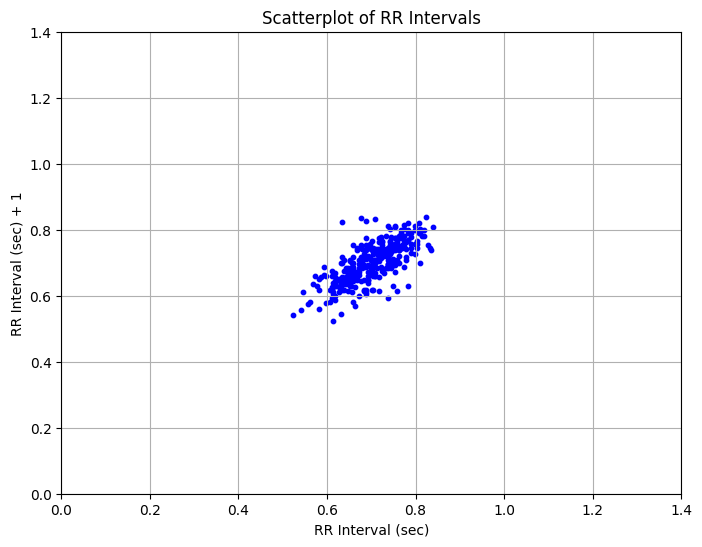

In [ ]:
show_scatter(RR_intervals)

# После 2 минут

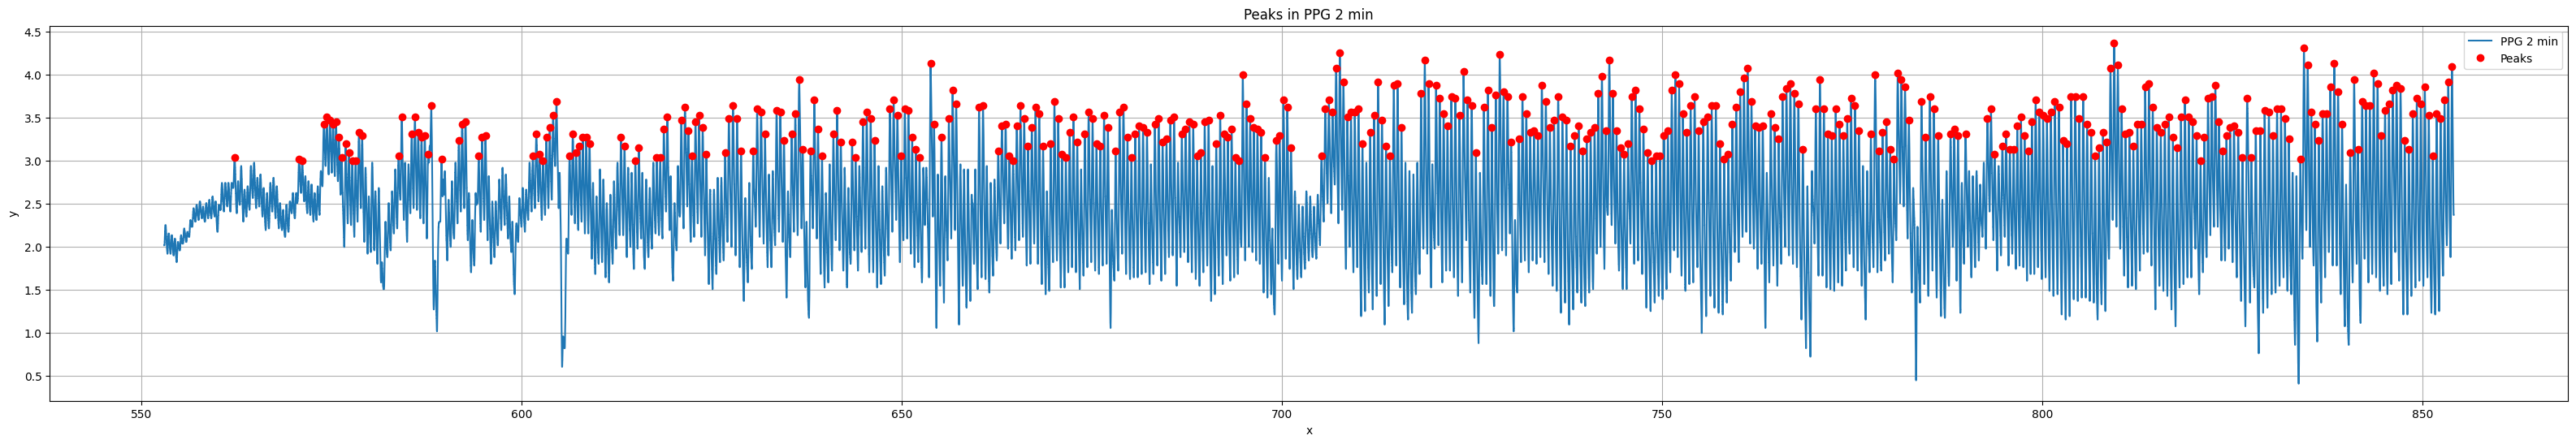

In [ ]:
peaks = show_data_with_peaks(PPG_2min, 'PPG 2 min')

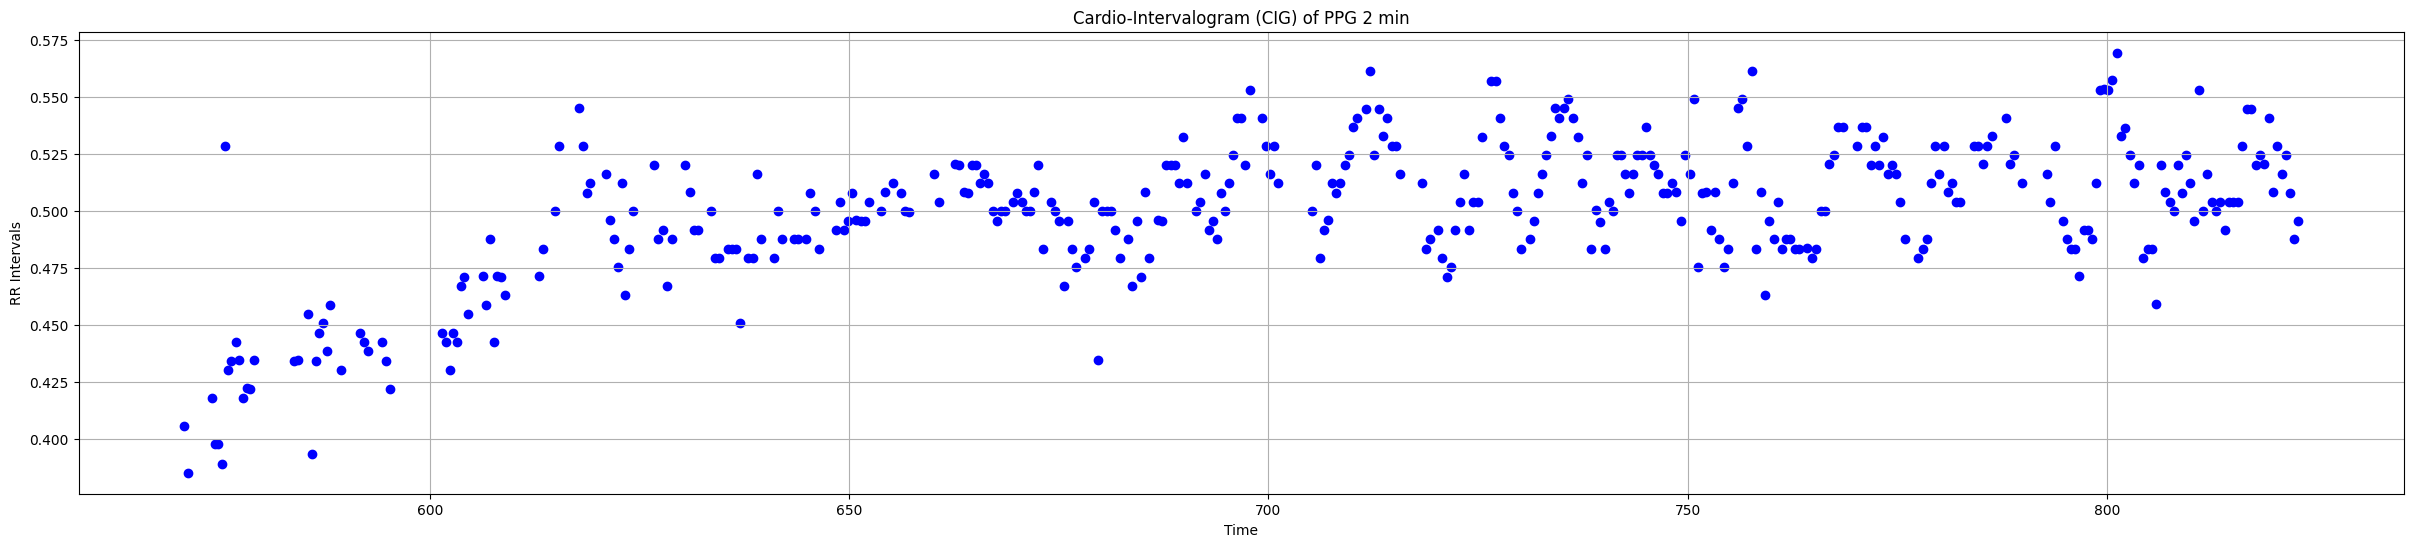

In [ ]:
RR_intervals = show_cig(PPG_2min, 'PPG 2 min', peaks, min_value=0.37, max_value=0.57)

Минимум = 0.38500976000000264
Максимум = 0.5693359399999736



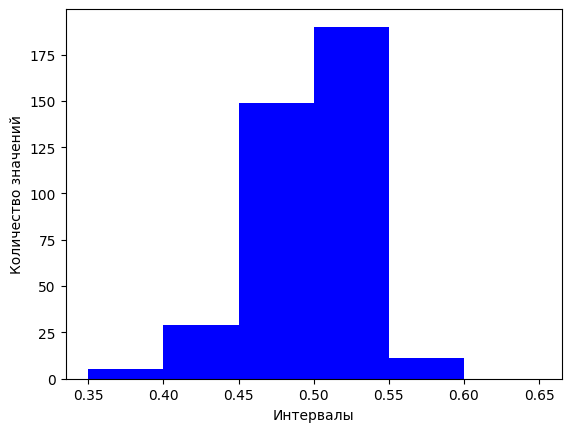

Для интервала 0.35000000000000003-0.4 количество значений = 5
Для интервала 0.4-0.45 количество значений = 29
Для интервала 0.45-0.5 количество значений = 149
Для интервала 0.5-0.55 количество значений = 190
Для интервала 0.55-0.6 количество значений = 11
Для интервала 0.6-0.6499999999999999 количество значений = 0


In [ ]:
n, bins = show_rrint_hist(RR_intervals)

In [ ]:
print_statistics(RR_intervals, PPG_2min, n, bins)

Частота сердечных сокращений: 76.50260918110436 уд/мин; Норма: 60…80
Среднее значение КИ: 499.66986963541694 мс; Норма: 660…937
Вариационный размах: 184.32617999997092 мс; Норма: 300…450
Среднеквадратичное отклонение: 31.32926638645269 мс; Норма: 100…190
Мода: 525.0 мс; Норма: 620…800
Амплитуда моды: 49.47916666666667%; Норма: 25…38
Квадратный корень суммы разностей последовательных КИ: 20.431365091098982; Норма: 15…35
Индекс напряжения регуляторных систем Баевского: 255.65015166604826; Норма: 30…120


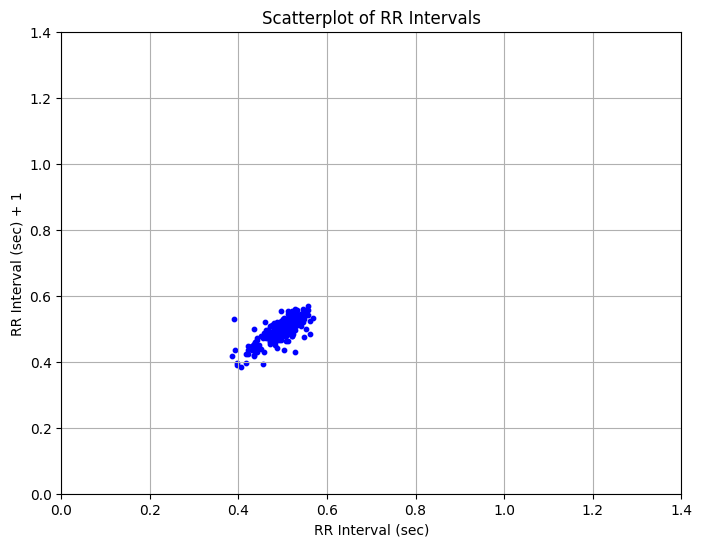

In [ ]:
show_scatter(RR_intervals)

# После 5 минут

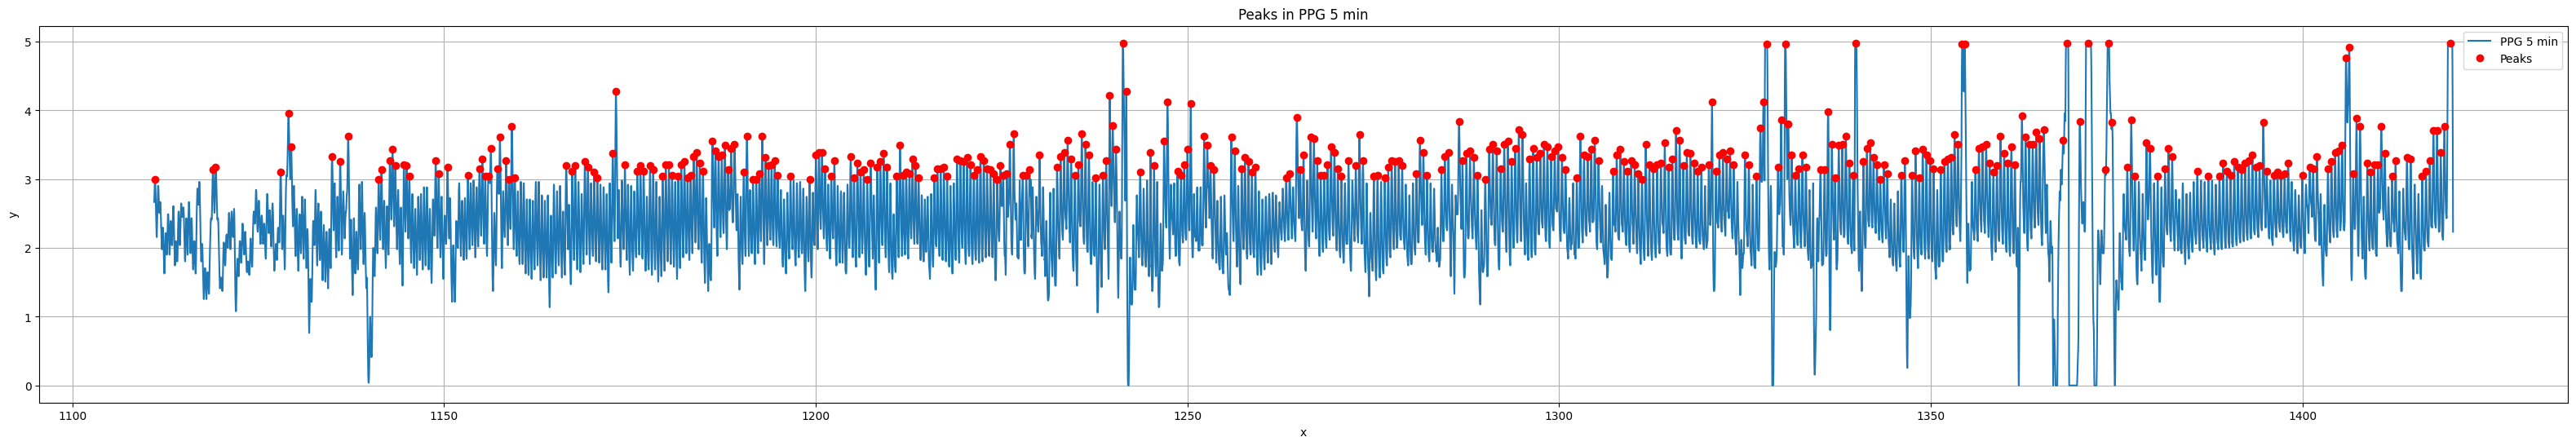

In [ ]:
peaks = show_data_with_peaks(PPG_5min, 'PPG 5 min')

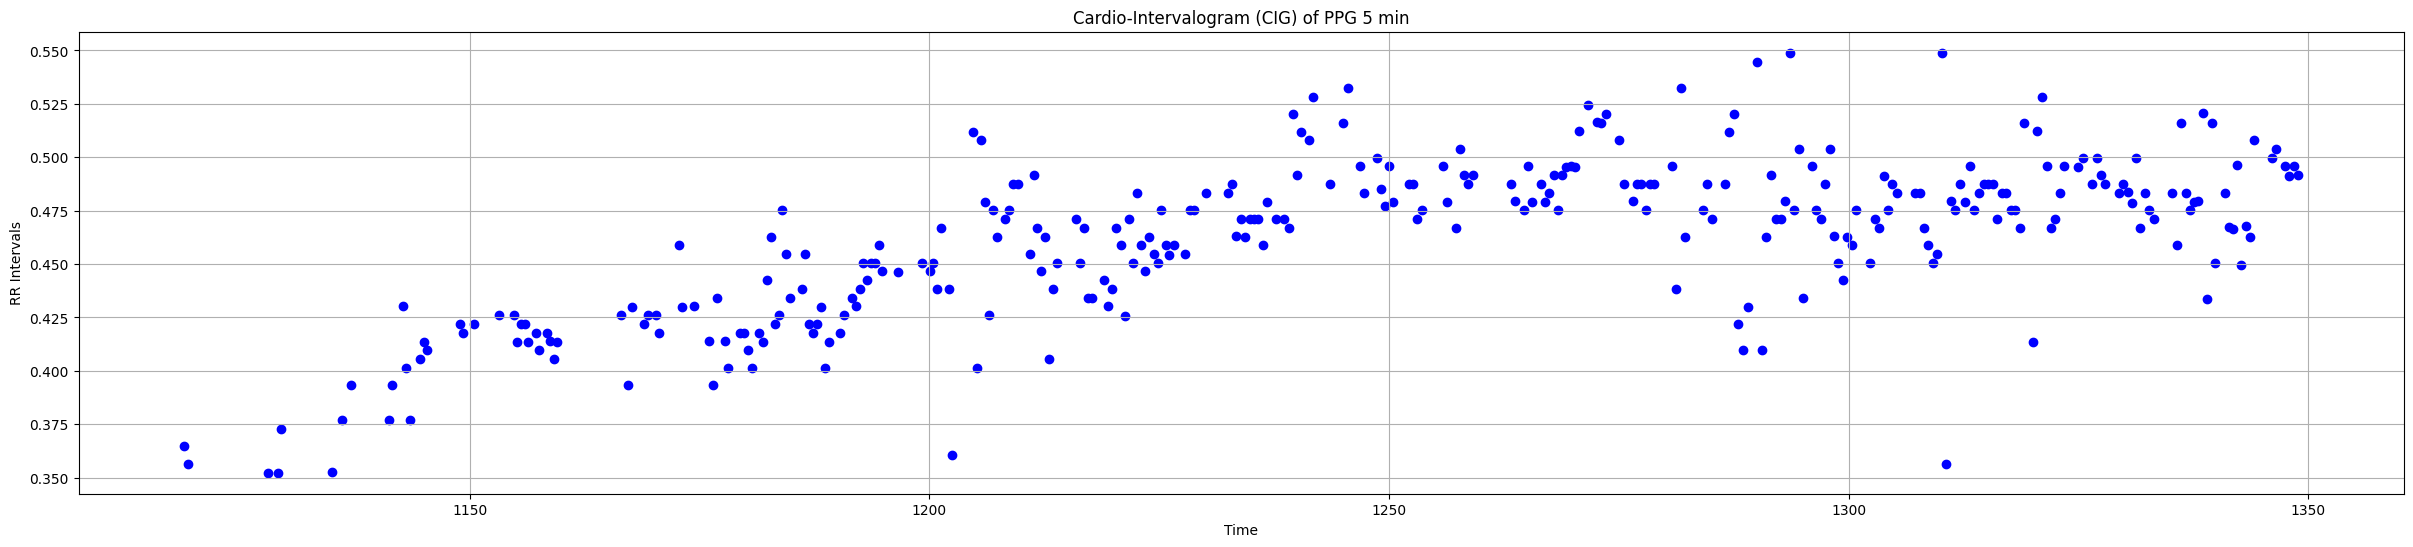

In [ ]:
RR_intervals = show_cig(PPG_5min, 'PPG 5 min', peaks, min_value=0.35, max_value=0.55)

Минимум = 0.3522949199998493
Максимум = 0.5489501900001414



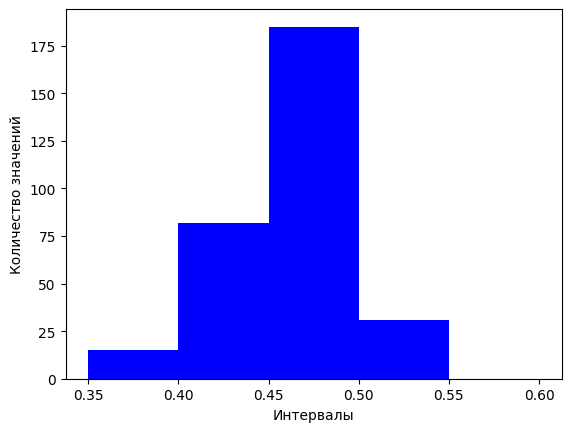

Для интервала 0.35000000000000003-0.4 количество значений = 15
Для интервала 0.4-0.45 количество значений = 82
Для интервала 0.45-0.5 количество значений = 185
Для интервала 0.5-0.55 количество значений = 31
Для интервала 0.55-0.6 количество значений = 0


In [ ]:
n, bins = show_rrint_hist(RR_intervals)

In [ ]:
print_statistics(RR_intervals, PPG_5min, n, bins)

Частота сердечных сокращений: 60.73586179434624 уд/мин; Норма: 60…80
Среднее значение КИ: 461.8657023003178 мс; Норма: 660…937
Вариационный размах: 196.65527000029215 мс; Норма: 300…450
Среднеквадратичное отклонение: 37.13129635437253 мс; Норма: 100…190
Мода: 475.0 мс; Норма: 620…800
Амплитуда моды: 59.105431309904155%; Норма: 25…38
Квадратный корень суммы разностей последовательных КИ: 32.754882868224506; Норма: 15…35
Индекс напряжения регуляторных систем Баевского: 316.37211392309604; Норма: 30…120


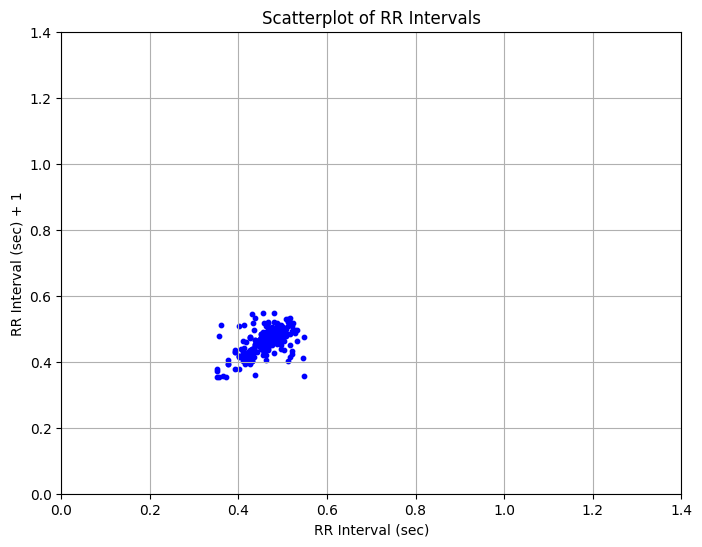

In [ ]:
show_scatter(RR_intervals)

# После 15 минут

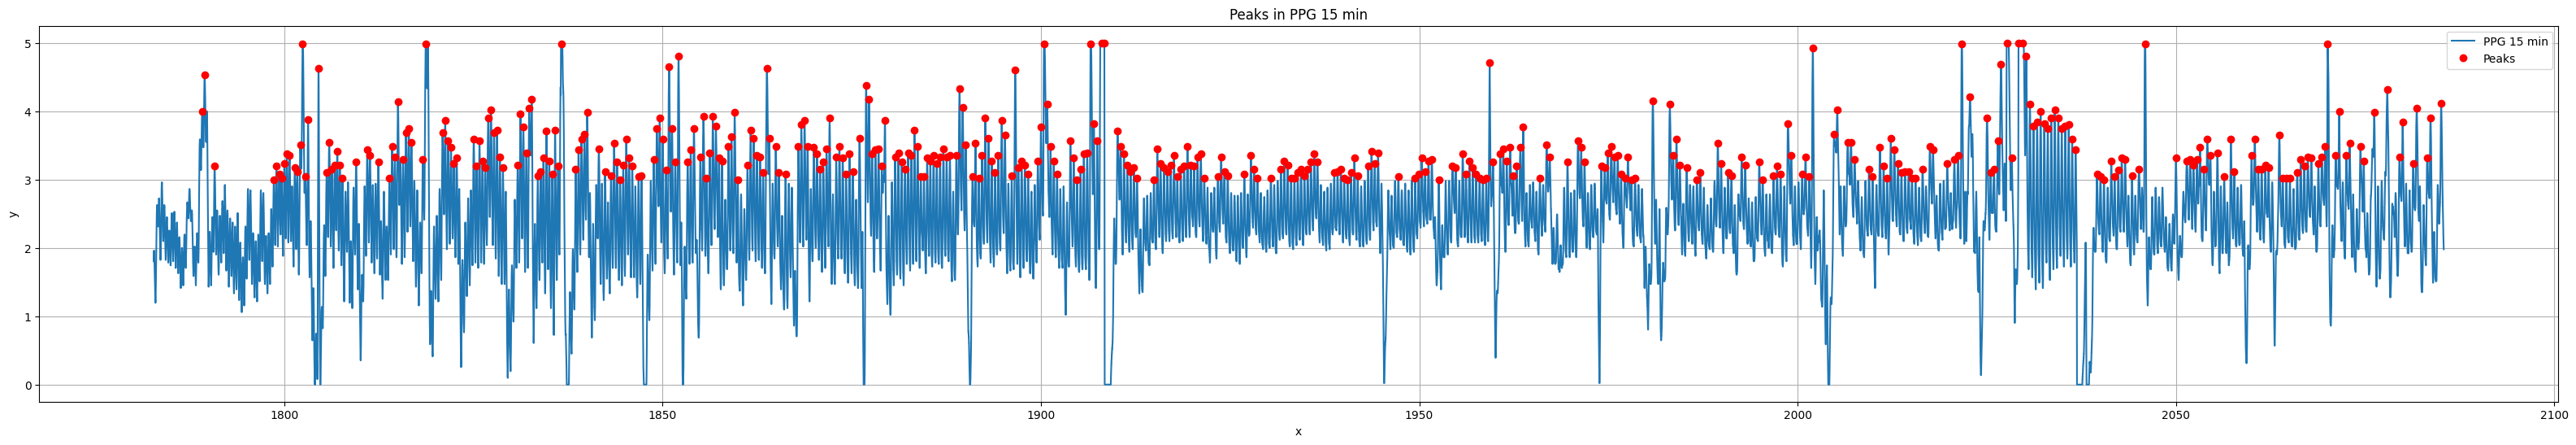

In [ ]:
peaks = show_data_with_peaks(PPG_15min, 'PPG 15 min')

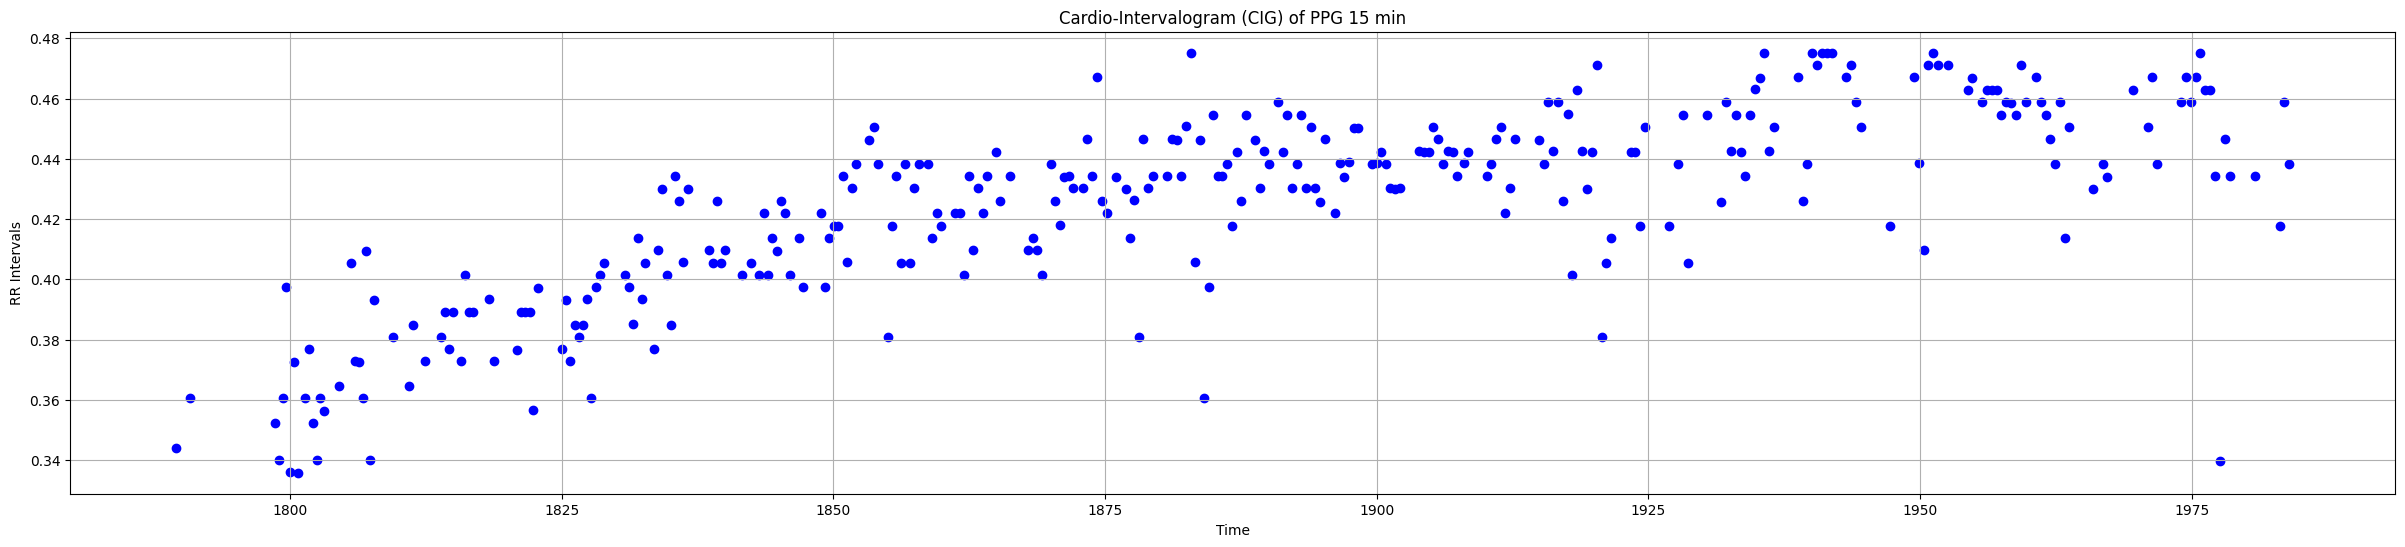

In [ ]:
RR_intervals = show_cig(PPG_15min, 'PPG 15 min', peaks, min_value=0.33, max_value=0.477)

Минимум = 0.3358154200000172
Максимум = 0.4752197299999352



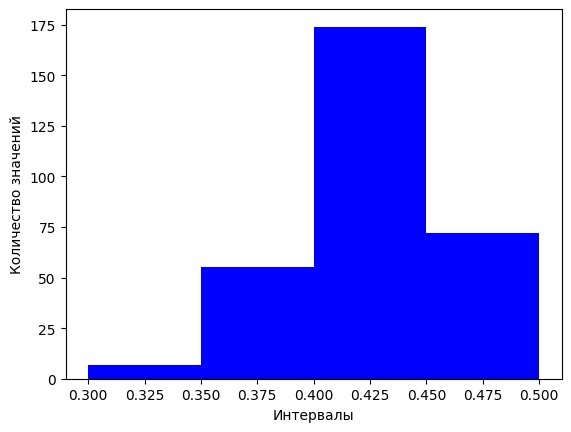

Для интервала 0.30000000000000004-0.35000000000000003 количество значений = 7
Для интервала 0.35000000000000003-0.4 количество значений = 55
Для интервала 0.4-0.45 количество значений = 174
Для интервала 0.45-0.5 количество значений = 72


In [ ]:
n, bins = show_rrint_hist(RR_intervals)

In [ ]:
print_statistics(RR_intervals, PPG_15min, n, bins)

Частота сердечных сокращений: 61.059099264176034 уд/мин; Норма: 60…80
Среднее значение КИ: 424.76782847402154 мс; Норма: 660…937
Вариационный размах: 139.40430999991804 мс; Норма: 300…450
Среднеквадратичное отклонение: 31.7990883094847 мс; Норма: 100…190
Мода: 425.00000000000006 мс; Норма: 620…800
Амплитуда моды: 56.493506493506494%; Норма: 25…38
Квадратный корень суммы разностей последовательных КИ: 24.33079838823359; Норма: 15…35
Индекс напряжения регуляторных систем Баевского: 476.76394521754065; Норма: 30…120


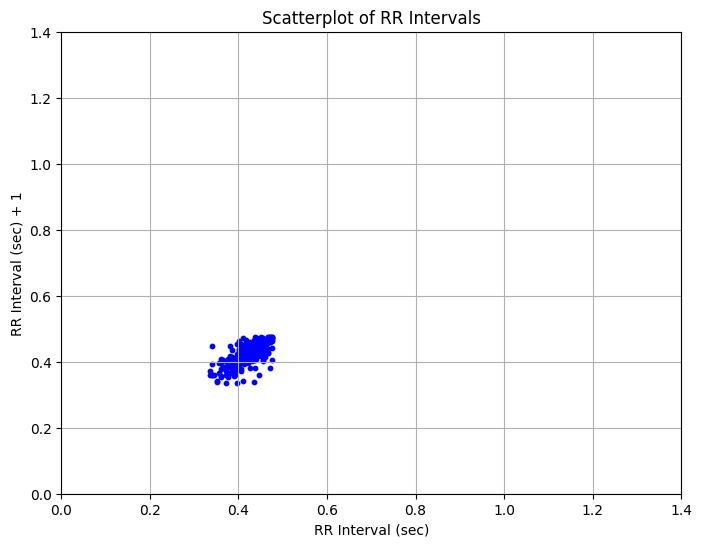

In [ ]:
show_scatter(RR_intervals)

# Графики изменения расчитанных параметров и выводы

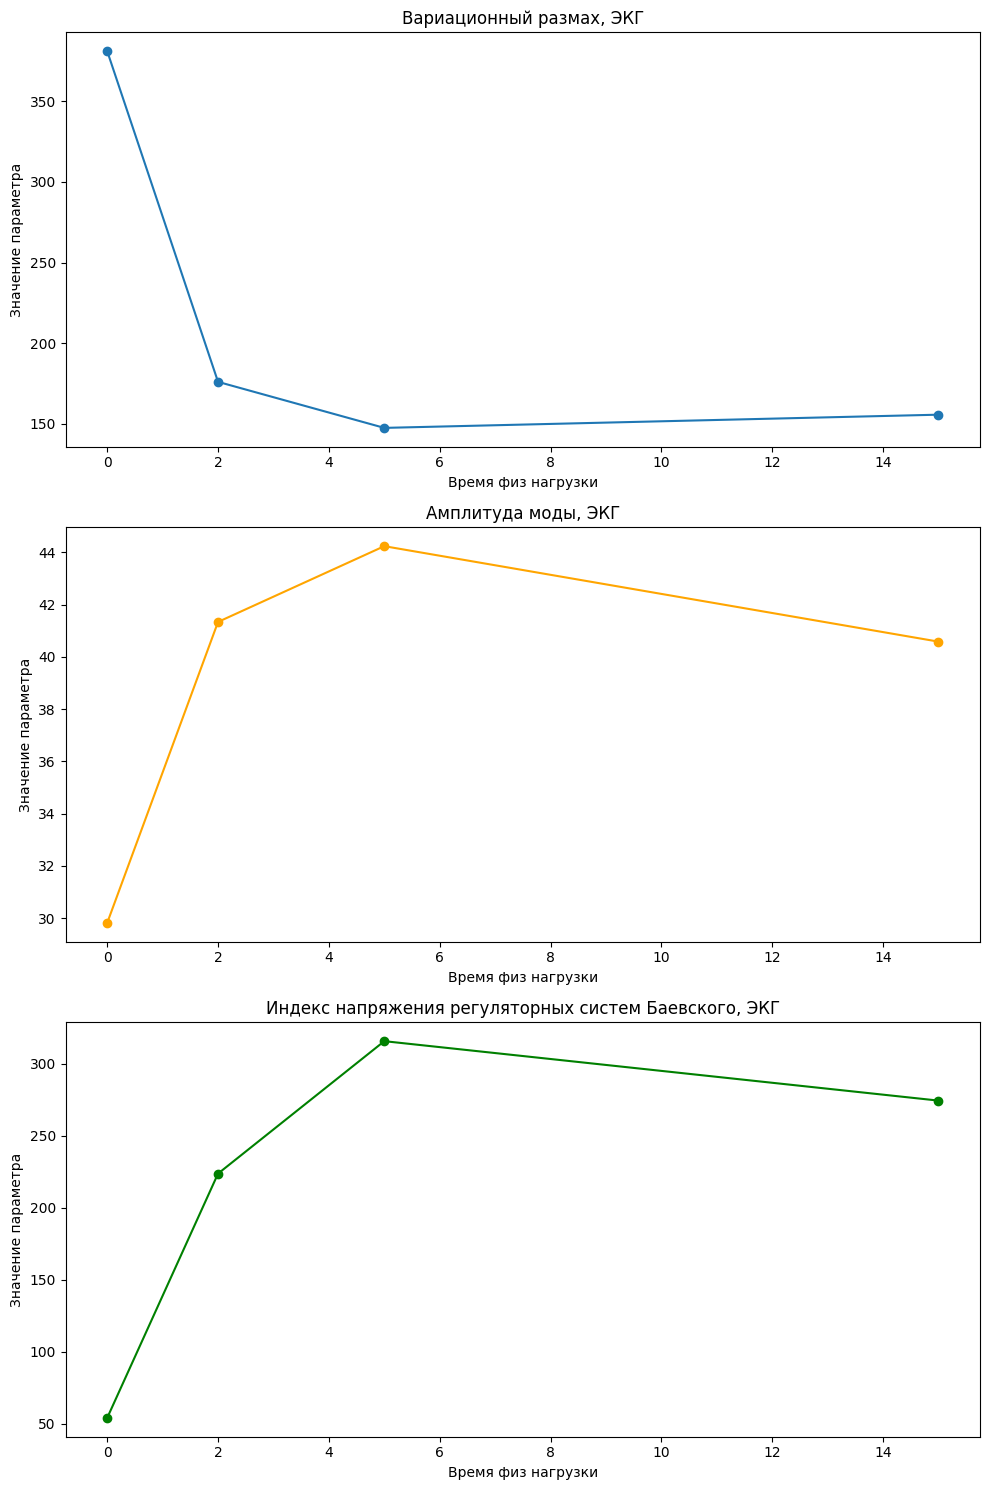

In [ ]:
import matplotlib.pyplot as plt

time = [0, 2, 5, 15]
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

axs[0].plot(time, ecg_drr, marker='o')
axs[0].set_title('Вариационный размах, ЭКГ')
axs[0].set_xlabel('Время физ нагрузки')
axs[0].set_ylabel('Значение параметра')

axs[1].plot(time, ecg_amo, marker='o', color='orange')
axs[1].set_title('Амплитуда моды, ЭКГ')
axs[1].set_xlabel('Время физ нагрузки')
axs[1].set_ylabel('Значение параметра')

axs[2].plot(time, ecg_im, marker='o', color='green')
axs[2].set_title('Индекс напряжения регуляторных систем Баевского, ЭКГ')
axs[2].set_xlabel('Время физ нагрузки')
axs[2].set_ylabel('Значение параметра')

plt.tight_layout()
plt.show()

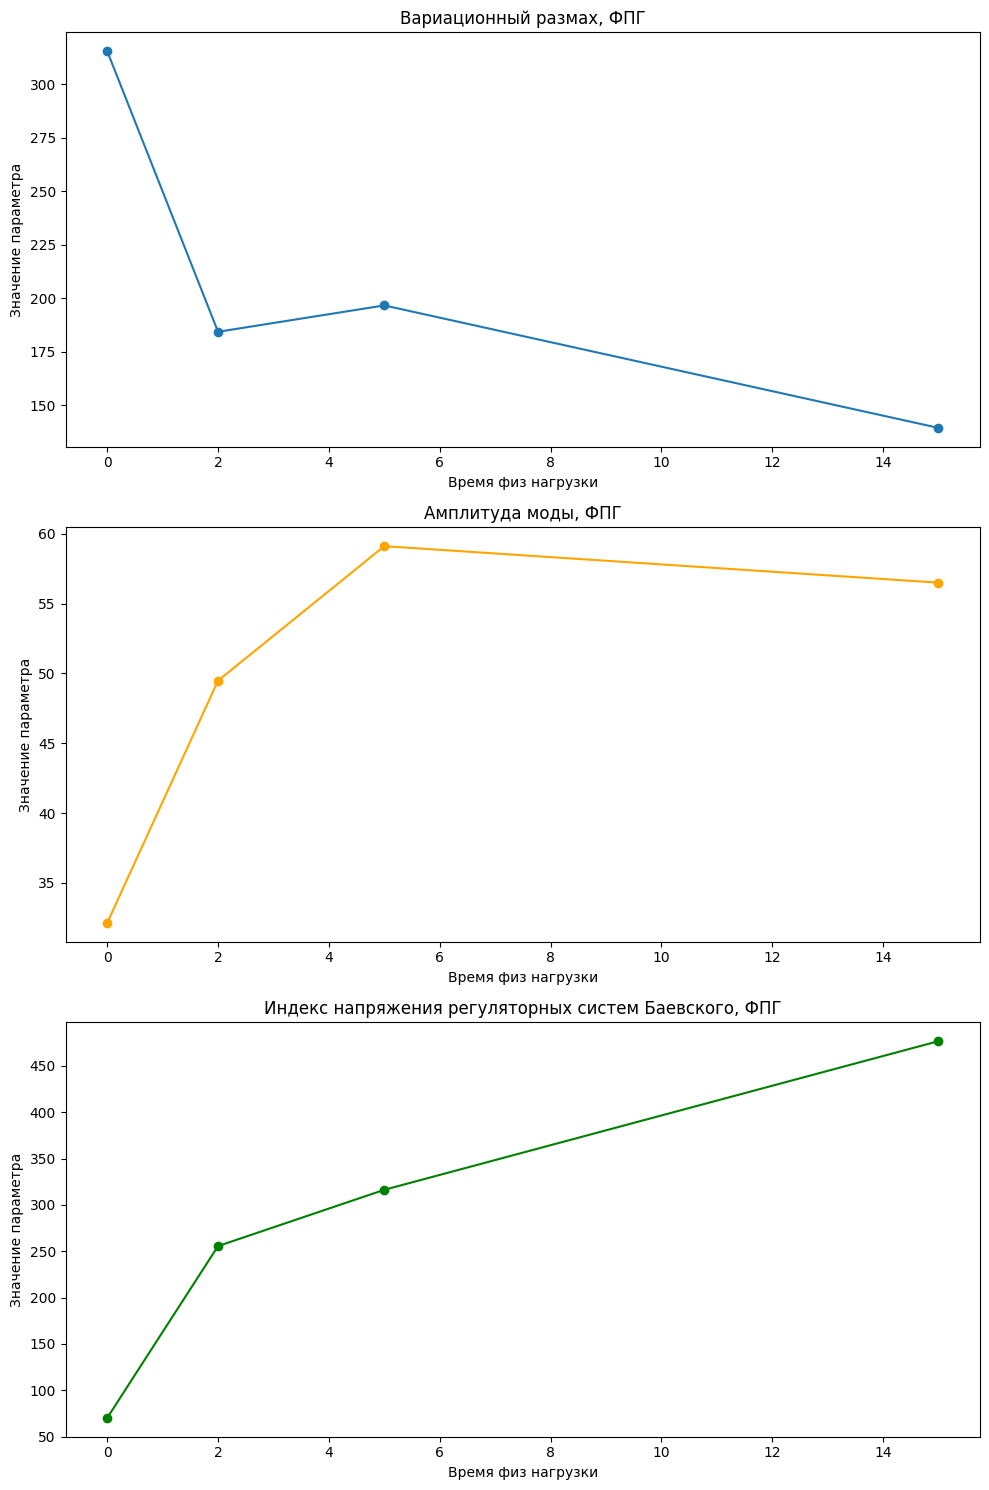

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 1, figsize=(10, 15))

axs[0].plot(time, ppg_drr, marker='o')
axs[0].set_title('Вариационный размах, ФПГ')
axs[0].set_xlabel('Время физ нагрузки')
axs[0].set_ylabel('Значение параметра')

axs[1].plot(time, ppg_amo, marker='o', color='orange')
axs[1].set_title('Амплитуда моды, ФПГ')
axs[1].set_xlabel('Время физ нагрузки')
axs[1].set_ylabel('Значение параметра')

axs[2].plot(time, ppg_im, marker='o', color='green')
axs[2].set_title('Индекс напряжения регуляторных систем Баевского, ФПГ')
axs[2].set_xlabel('Время физ нагрузки')
axs[2].set_ylabel('Значение параметра')

plt.tight_layout()
plt.show()

## Вывод

С увеличением продолжительности физ. нагрузки значение вариационного размаха уменьшается, что означает снижение вариативности кардиоинтервалов. Амплитуда моды (процент кариоинтервалов, соответствующих значению моды) увеличивается при увеличении продолжительности физ. нагрузки до 5 минут, в последнем замере (для 15 минут) амплитуда моды немного снизилась, что, возможно свидетельствует о некоторой адаптации организма к физ. нагрузке. Индекс напряжения регуляторных систем увеличивается, что говорит об активации симпатической нервной системы, она усиливает обмен веществ, повышает возбуждаемость большинства тканей, мобилизует силы организма на активную деятельность.